Cross-Selling:

Cross-selling involves offering customers additional products or services that are related to or complement their initial purchase.
The goal is to increase the total value of the customer's purchase by suggesting relevant and complementary items.
Examples: Suggesting a protective case when buying a new smartphone, or offering a warranty when purchasing a major appliance.

Upselling:

Upselling is the practice of encouraging customers to purchase a higher-end, more premium, or more feature-rich version of a product or service they are interested in.
The aim is to increase the average order value by persuading customers to upgrade their purchase.
Examples: Offering a more powerful laptop model with upgraded specifications, or suggesting a deluxe hotel room instead of a standard one.

Customer Segmentation: Classifying customers based on their purchasing behavior, preferences, and demographics to tailor marketing strategies effectively.

RFM Analysis: Evaluating Recency, Frequency, and Monetary (RFM) metrics to understand customer value and identify high-potential segments for cross-selling.

Time Series Analysis: Track changes in customer behavior over time (e.g., frequency of purchases or seasonal buying patterns). This helps to identify trends, seasonality, and opportunities for timely cross-selling (e.g., increasing marketing efforts during periods of higher activity).








In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

**Data Reading**

In [3]:
data = pd.read_csv('data.csv', encoding='latin1')


In [4]:
df=pd.DataFrame(data.copy())
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


**Descriptive Analysis**

In [5]:
df.shape

(541909, 8)

In [6]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [7]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

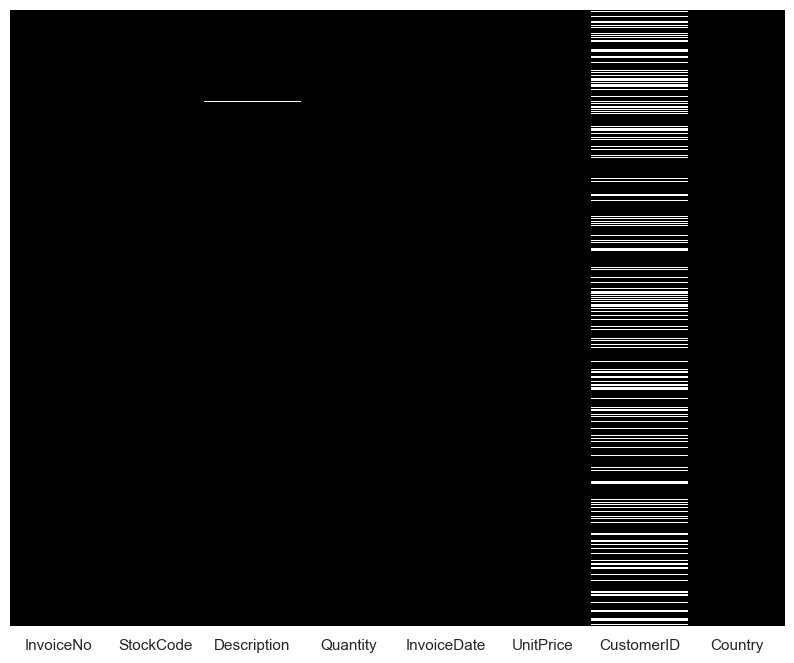

In [8]:
plt.subplots(figsize=(10, 8))
sns.heatmap(df.isnull(), yticklabels = False,cbar = False, cmap='cubehelix')
plt.show()

In [9]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

From above we can see that Description and Customer ID contains missing values, this fact will be processed and examine in further steps

In [10]:
df.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

From descriptive statistics of quantitative variables (Quantity and Price), we could see that there are negative values in these variables, which are only possible in retail industry.
 The order/item was returned and payment is reimbursed that can be used to indicate the quality of customer sstisfaction and can be the triggering point for Quality Assurance Unit to take actions to minimize the order return rate.



In [11]:
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [12]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


Let's have a closer look on the reason of negative values in these variables. In the description of dataset it is written that there are some canceled transactions presented in dataset. Canceled transactions is indicated by invoice number which starts with letter 'c'. Probably transactions with negative values of quantity are canceled.

Filtering transaction with invoice number started with letter 'C':

In [13]:
cancelledOrder = df[df['InvoiceNo'].astype(str).str.contains('C')]
cancelledOrder.head(20)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
239,C536391,21484,CHICK GREY HOT WATER BOTTLE,-12,12/1/2010 10:24,3.45,17548.0,United Kingdom
240,C536391,22557,PLASTERS IN TIN VINTAGE PAISLEY,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
241,C536391,22553,PLASTERS IN TIN SKULLS,-24,12/1/2010 10:24,1.65,17548.0,United Kingdom
939,C536506,22960,JAM MAKING SET WITH JARS,-6,12/1/2010 12:38,4.25,17897.0,United Kingdom


In [14]:
cancelledOrder[cancelledOrder['Quantity']>=0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [15]:
print("CancelledOrder transactions:", len(cancelledOrder))
print("Total transaction with negative quantity:", df[df['Quantity'] <= 0 ]['Quantity'].count())

CancelledOrder transactions: 9288
Total transaction with negative quantity: 10624


Average cancelled items per order(Get Ratio)

There are also transactions with zero price. Transactions with zero price doesn't bring useful information to analysis, moreover mainly there are not any description for such transactions. This transactions could be deleted.

In [16]:
df = df[~df['InvoiceNo'].astype(str).str.contains('C')]  
df_QP = df[[ 'Quantity', 'UnitPrice']]
QP= df_QP.apply(lambda x:x['Quantity'] <= 0 and x['UnitPrice'] <= 0, axis=1)
df_QP = df_QP[QP].reset_index()
df_QP.head(10)

,index,Quantity,UnitPrice
0,2406,-10,0.0
1,4347,-38,0.0
2,7188,-20,0.0
3,7189,-20,0.0
4,7190,-6,0.0
5,7192,-22,0.0
6,7193,-6,0.0
7,7195,-2,0.0
8,7196,-30,0.0
9,7197,-70,0.0


In [17]:

percent_cancelled = round(len(cancelledOrder) / len(df) * 100, 2)
percent_zero_negative_price = round(len(df[df['UnitPrice'] <= 0]) / len(df) * 100, 2)

# Print the percentages
print("% of cancelledOrder transactions:", percent_cancelled, "%")
print("% of transactions with zero or negative price:", percent_zero_negative_price, "%")



% of cancelledOrder transactions: 1.74 %
% of transactions with zero or negative price: 0.47 %


Cancellation Ratio

In [18]:
if percent_zero_negative_price != 0:  # Avoid division by zero
    division_result = percent_cancelled / percent_zero_negative_price
    print("Cancellation Ratio:", division_result)
else:
    print("Cannot divide by zero: % of transactions with zero or negative price is zero.")

Cancellation Ratio: 3.7021276595744683


Hovewer some transactions with negative quantity doesn't belong to cancelledOrder:

Dropping Unspecified Country Rows



In [19]:
df[df['Country']=='Unspecified'].shape

(446, 8)

In [20]:
df.drop(df[df['Country']=='Unspecified'].index,inplace=True)

Dropping duplicate rows





In [21]:
#Checking duplicate rows in DataFrame
df.loc[df.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,12/1/2010 11:49,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,12/9/2011 11:34,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,12/9/2011 11:34,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,12/9/2011 11:34,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,12/9/2011 11:34,2.10,14446.0,United Kingdom


In [22]:
#Removing Duplicate rows in DataFrame
df.drop_duplicates(inplace=True)

In [23]:
#Checking duplicate rows in DataFrame
df.loc[df.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [24]:
df.shape

(526948, 8)

In [25]:
#Resetting the index value 
df = df.reset_index(drop=True)

In [26]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,526948.0,10.313669,160.434306,-9600.00,1.00,3.00,11.00,80995.00
UnitPrice,526948.0,3.862908,41.981259,-11062.06,1.25,2.08,4.13,13541.33
CustomerID,392491.0,15288.689053,1713.248172,12346.00,13956.00,15152.00,16791.00,18287.00


Feature Selection

In [27]:
# converting arrival date into quarter,dayofweek,day,month and year
df['Month']=pd.DatetimeIndex(df['InvoiceDate']).strftime('%b')
df['Year']=pd.DatetimeIndex(df['InvoiceDate']).year
df['Day']=pd.DatetimeIndex(df['InvoiceDate']).day
df['Daysofweek']=pd.DatetimeIndex(df['InvoiceDate']).day_name()
df['Quarter']=pd.DatetimeIndex(df['InvoiceDate']).quarter
df['TimeHour']=pd.DatetimeIndex(df['InvoiceDate']).strftime('%H')
df['Time']=pd.DatetimeIndex(df['InvoiceDate']).strftime('%H:%M')
df['Date']=pd.DatetimeIndex(df['InvoiceDate']).date
df['International Shipping/Service']=0
df['Weekend']=0
df['WeekDays']=0


In [28]:
df.loc[(df['Daysofweek']=='Saturday') | (df['Daysofweek']=='Sunday'),'Weekend']=1

In [29]:
df.loc[(df['Daysofweek']!='Saturday') & (df['Daysofweek']!='Sunday'),'WeekDays']=1

In [30]:
df.loc[df['Country']!='United Kingdom','International Shipping/Service']=1

In [31]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Year,Day,Daysofweek,Quarter,TimeHour,Time,Date,International Shipping/Service,Weekend,WeekDays
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,Dec,2010,1,Wednesday,4,08,08:26,2010-12-01,0,0,1
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Dec,2010,1,Wednesday,4,08,08:26,2010-12-01,0,0,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,Dec,2010,1,Wednesday,4,08,08:26,2010-12-01,0,0,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Dec,2010,1,Wednesday,4,08,08:26,2010-12-01,0,0,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Dec,2010,1,Wednesday,4,08,08:26,2010-12-01,0,0,1


 Checking Non Item StockCode and drops these rows

In [32]:
df['StockCode']=df['StockCode'].map(str)

In [33]:
Saledf=df
NonItems_df=df[df['StockCode'].str.isalpha()]
df.drop(df[df['StockCode'].str.isalpha()].index,inplace=True)
NonItems_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Year,Day,Daysofweek,Quarter,TimeHour,Time,Date,International Shipping/Service,Weekend,WeekDays
45,536370,POST,POSTAGE,3,12/1/2010 8:45,18.00,12583.0,France,Dec,2010,1,Wednesday,4,08,08:45,2010-12-01,1,0,1
377,536403,POST,POSTAGE,1,12/1/2010 11:27,15.00,12791.0,Netherlands,Dec,2010,1,Wednesday,4,11,11:27,2010-12-01,1,0,1
1088,536527,POST,POSTAGE,1,12/1/2010 13:04,18.00,12662.0,Germany,Dec,2010,1,Wednesday,4,13,13:04,2010-12-01,1,0,1
1766,536544,DOT,DOTCOM POSTAGE,1,12/1/2010 14:32,569.77,NaN,United Kingdom,Dec,2010,1,Wednesday,4,14,14:32,2010-12-01,0,0,1
2169,536569,M,Manual,1,12/1/2010 15:35,1.25,16274.0,United Kingdom,Dec,2010,1,Wednesday,4,15,15:35,2010-12-01,0,0,1


In [34]:
df.shape

(524751, 19)

In [35]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Year,Day,Daysofweek,Quarter,TimeHour,Time,Date,International Shipping/Service,Weekend,WeekDays
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,Dec,2010,1,Wednesday,4,08,08:26,2010-12-01,0,0,1
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Dec,2010,1,Wednesday,4,08,08:26,2010-12-01,0,0,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,Dec,2010,1,Wednesday,4,08,08:26,2010-12-01,0,0,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Dec,2010,1,Wednesday,4,08,08:26,2010-12-01,0,0,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Dec,2010,1,Wednesday,4,08,08:26,2010-12-01,0,0,1


In [36]:
df['Description']=df['Description'].map(str)

Checking Price variation for a single items

In [37]:
df[df['StockCode']=='85123A'].head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Year,Day,Daysofweek,Quarter,TimeHour,Time,Date,International Shipping/Service,Weekend,WeekDays
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,Dec,2010,1,Wednesday,4,08,08:26,2010-12-01,0,0,1
49,536373,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 9:02,2.55,17850.0,United Kingdom,Dec,2010,1,Wednesday,4,09,09:02,2010-12-01,0,0,1
66,536375,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 9:32,2.55,17850.0,United Kingdom,Dec,2010,1,Wednesday,4,09,09:32,2010-12-01,0,0,1
218,536390,85123A,WHITE HANGING HEART T-LIGHT HOLDER,64,12/1/2010 10:19,2.55,17511.0,United Kingdom,Dec,2010,1,Wednesday,4,10,10:19,2010-12-01,0,0,1
253,536394,85123A,WHITE HANGING HEART T-LIGHT HOLDER,32,12/1/2010 10:39,2.55,13408.0,United Kingdom,Dec,2010,1,Wednesday,4,10,10:39,2010-12-01,0,0,1


Checking if all the Stock Code are numeric

In [38]:
df[df['StockCode'].str.isdigit()].shape

(473728, 19)

Checking Mixed items

In [39]:
mixed_df=df.loc[df['Description'].str.contains('mixed',na=False)]

In [40]:
df.drop(df.loc[df['Description'].str.contains('mixed',na=False)].index,inplace=True)

In [41]:
df.reset_index(drop=True).tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Year,Day,Daysofweek,Quarter,TimeHour,Time,Date,International Shipping/Service,Weekend,WeekDays
524744,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,Dec,2011,9,Friday,4,12,12:50,2011-12-09,1,0,1
524745,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,Dec,2011,9,Friday,4,12,12:50,2011-12-09,1,0,1
524746,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,Dec,2011,9,Friday,4,12,12:50,2011-12-09,1,0,1
524747,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,Dec,2011,9,Friday,4,12,12:50,2011-12-09,1,0,1
524748,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France,Dec,2011,9,Friday,4,12,12:50,2011-12-09,1,0,1


In [42]:
df.loc[df['Description']=='nan'].shape

(1449, 19)

In [43]:
df.loc[df['StockCode'].str.contains('84292',na=False)].head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Year,Day,Daysofweek,Quarter,TimeHour,Time,Date,International Shipping/Service,Weekend,WeekDays


Removing Null  Customer ID

In [44]:
NullCustomer_df=df[df['CustomerID'].isnull()]

In [45]:
df.drop(df[df['CustomerID'].isnull()].index,inplace=True)

In [46]:
df.reset_index().head(5)

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Year,Day,Daysofweek,Quarter,TimeHour,Time,Date,International Shipping/Service,Weekend,WeekDays
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,Dec,2010,1,Wednesday,4,08,08:26,2010-12-01,0,0,1
1,1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Dec,2010,1,Wednesday,4,08,08:26,2010-12-01,0,0,1
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,Dec,2010,1,Wednesday,4,08,08:26,2010-12-01,0,0,1
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Dec,2010,1,Wednesday,4,08,08:26,2010-12-01,0,0,1
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Dec,2010,1,Wednesday,4,08,08:26,2010-12-01,0,0,1


In [47]:
df.shape

(391087, 19)

Numeric Digit Stock Code

In [48]:
df['DigitStockCode']=df.StockCode.str.extract('(\d+)')

In [49]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Year,Day,Daysofweek,Quarter,TimeHour,Time,Date,International Shipping/Service,Weekend,WeekDays,DigitStockCode
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,Dec,2010,1,Wednesday,4,08,08:26,2010-12-01,0,0,1,85123
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Dec,2010,1,Wednesday,4,08,08:26,2010-12-01,0,0,1,71053
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,Dec,2010,1,Wednesday,4,08,08:26,2010-12-01,0,0,1,84406
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Dec,2010,1,Wednesday,4,08,08:26,2010-12-01,0,0,1,84029
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Dec,2010,1,Wednesday,4,08,08:26,2010-12-01,0,0,1,84029


 Filling Price Entries equal to 0

In [50]:
df[(df['UnitPrice']==0)].head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Year,Day,Daysofweek,Quarter,TimeHour,Time,Date,International Shipping/Service,Weekend,WeekDays,DigitStockCode
9034,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,12/5/2010 14:02,0.0,12647.0,Germany,Dec,2010,5,Sunday,4,14,14:02,2010-12-05,1,1,0,22841
32563,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,12/16/2010 14:36,0.0,16560.0,United Kingdom,Dec,2010,16,Thursday,4,14,14:36,2010-12-16,0,0,1,22580
38898,539722,22423,REGENCY CAKESTAND 3 TIER,10,12/21/2010 13:45,0.0,14911.0,EIRE,Dec,2010,21,Tuesday,4,13,13:45,2010-12-21,1,0,1,22423
45722,540372,22090,PAPER BUNTING RETROSPOT,24,1/6/2011 16:41,0.0,13081.0,United Kingdom,Jan,2011,6,Thursday,1,16,16:41,2011-01-06,0,0,1,22090
45724,540372,22553,PLASTERS IN TIN SKULLS,24,1/6/2011 16:41,0.0,13081.0,United Kingdom,Jan,2011,6,Thursday,1,16,16:41,2011-01-06,0,0,1,22553


In [51]:
for k in df[(df['UnitPrice']==0)].index:
  temp=df[(df['UnitPrice']!=0) & (df['DigitStockCode']==df.loc[k,'DigitStockCode'])]
  df.loc[k,'UnitPrice']=temp['UnitPrice'].mean()

Creating Total Sales Column

In [52]:
df['Total Sales']=round((df['UnitPrice'] * df['Quantity']),2)

Dropping Non Sale Entries

In [53]:
df[df.DigitStockCode.str.len()<5].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Year,...,Daysofweek,Quarter,TimeHour,Time,Date,International Shipping/Service,Weekend,WeekDays,DigitStockCode,Total Sales
1377,536540,C2,CARRIAGE,1,12/1/2010 14:05,50.0,14911.0,EIRE,Dec,2010,...,Wednesday,4,14,14:05,2010-12-01,1,0,1,2,50.0
11769,537368,C2,CARRIAGE,1,12/6/2010 12:40,50.0,14911.0,EIRE,Dec,2010,...,Monday,4,12,12:40,2010-12-06,1,0,1,2,50.0
12090,537378,C2,CARRIAGE,1,12/6/2010 13:06,50.0,14911.0,EIRE,Dec,2010,...,Monday,4,13,13:06,2010-12-06,1,0,1,2,50.0
19401,537963,C2,CARRIAGE,1,12/9/2010 11:30,50.0,13369.0,United Kingdom,Dec,2010,...,Thursday,4,11,11:30,2010-12-09,0,0,1,2,50.0
19440,538002,C2,CARRIAGE,1,12/9/2010 11:48,50.0,14932.0,Channel Islands,Dec,2010,...,Thursday,4,11,11:48,2010-12-09,1,0,1,2,50.0


In [54]:
df.drop((df[df.DigitStockCode.str.len()<5].index),inplace=True)

 Dropping Cancel Orders 

In [55]:
CancelOrder_df=df.loc[df['InvoiceNo'].str.contains('C',na=False)]
df.drop(df[df['InvoiceNo'].str.contains('C',na=False)].index,inplace=True)
CancelOrder_df.shape

(0, 21)

**Changing Column Name**

In [56]:
df.rename(columns={'Customer ID':'CustomerID'},inplace=True)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Year,...,Daysofweek,Quarter,TimeHour,Time,Date,International Shipping/Service,Weekend,WeekDays,DigitStockCode,Total Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,Dec,2010,...,Wednesday,4,08,08:26,2010-12-01,0,0,1,85123,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Dec,2010,...,Wednesday,4,08,08:26,2010-12-01,0,0,1,71053,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,Dec,2010,...,Wednesday,4,08,08:26,2010-12-01,0,0,1,84406,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Dec,2010,...,Wednesday,4,08,08:26,2010-12-01,0,0,1,84029,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Dec,2010,...,Wednesday,4,08,08:26,2010-12-01,0,0,1,84029,20.34


**Countries Longitude and Latitude**

In [57]:
import geopy
from geopy.geocoders import Nominatim
import pandas as pd

# Set up the geolocator with a custom user agent
geolocator = Nominatim(user_agent="my_geo_app_v1")

# Add empty Latitude and Longitude columns
df['Latitude'] = ""
df['Longitude'] = ""

# Loop through unique countries and get their geolocation
for k in df['Country'].unique():
    try:
        loc = geolocator.geocode(k)
        if loc:
            # Assign latitude and longitude to matching rows
            df.loc[df['Country'] == k, ['Latitude', 'Longitude']] = loc.latitude, loc.longitude
        else:
            print(f"Location not found for {k}")
    except Exception as e:
        print(f"Error occurred for {k}: {e}")

# Print the dataframe to check the results
print(df[['Country', 'Latitude', 'Longitude']])


               Country   Latitude Longitude
0       United Kingdom  54.702354 -3.276575
1       United Kingdom  54.702354 -3.276575
2       United Kingdom  54.702354 -3.276575
3       United Kingdom  54.702354 -3.276575
4       United Kingdom  54.702354 -3.276575
...                ...        ...       ...
526943          France  46.603354  1.888334
526944          France  46.603354  1.888334
526945          France  46.603354  1.888334
526946          France  46.603354  1.888334
526947          France  46.603354  1.888334

[390954 rows x 3 columns]


**Graphical Representation**

In [58]:
#Setting Matplotlib Params
plt.rcParams['font.size']='12'
plt.rcParams['font.weight']='bold'
plt.rcParams['font.family'] = 'Times New Roman'
#seaborn Styling
sns.set_style('whitegrid')

In [59]:
Months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
WeekDays=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

**Unique Products**

In [60]:
print('Total Number of Unique Product:',len(df['DigitStockCode'].unique()))

Total Number of Unique Product: 3194


 **Invoices Issued**

In [61]:
print('Total Invoice issued:',len(df['InvoiceNo'].unique()))

Total Invoice issued: 18408


 **How many orders per month?**

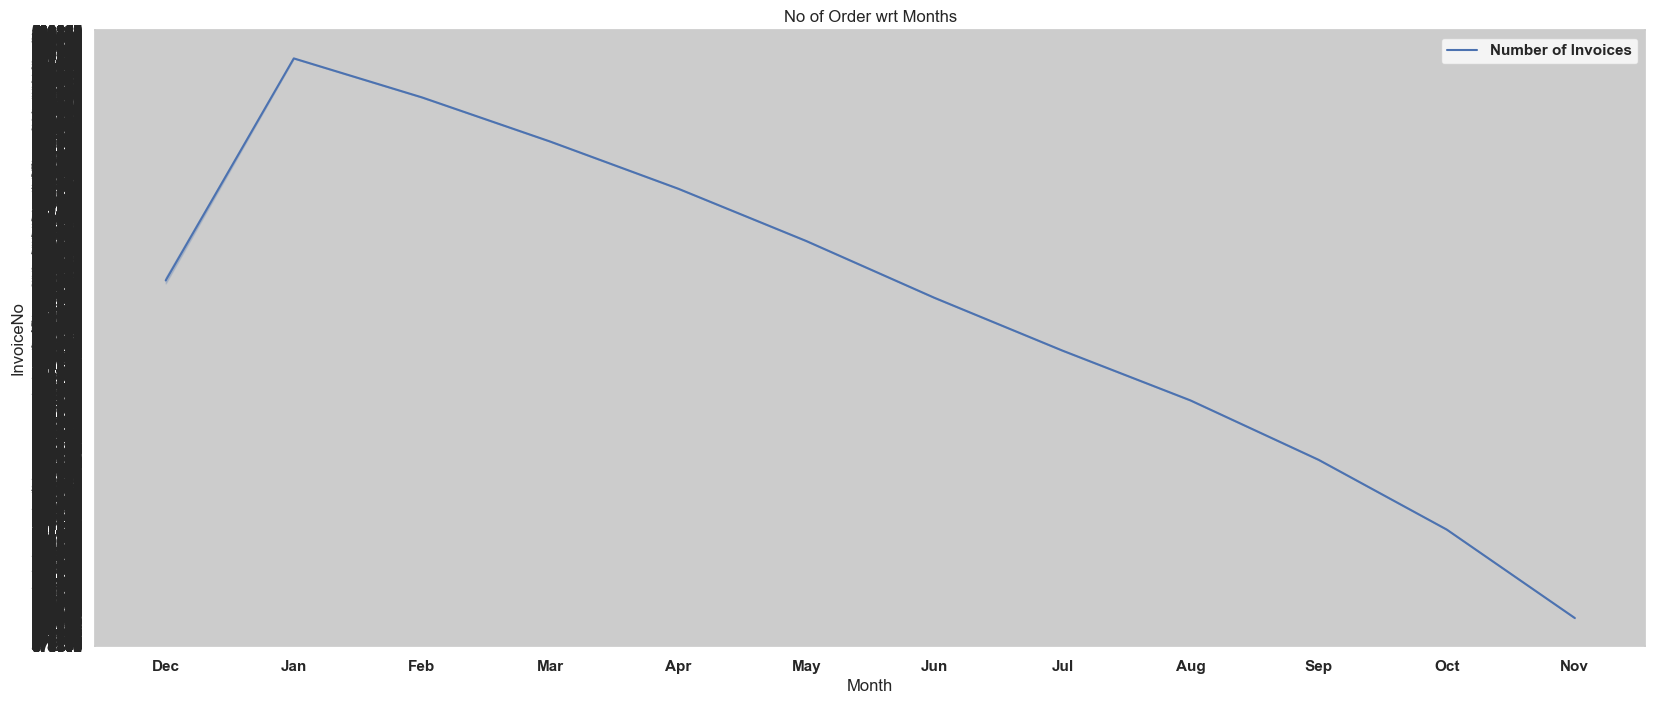

In [62]:
figsize=(20, 8)
f, ax = plt.subplots(1, 1, figsize=figsize)
ax = sns.lineplot(ax = ax,x="Month", y="InvoiceNo", data = df, label="Number of Invoices").set_title('No of Order wrt Months')

 **How many orders per day?**

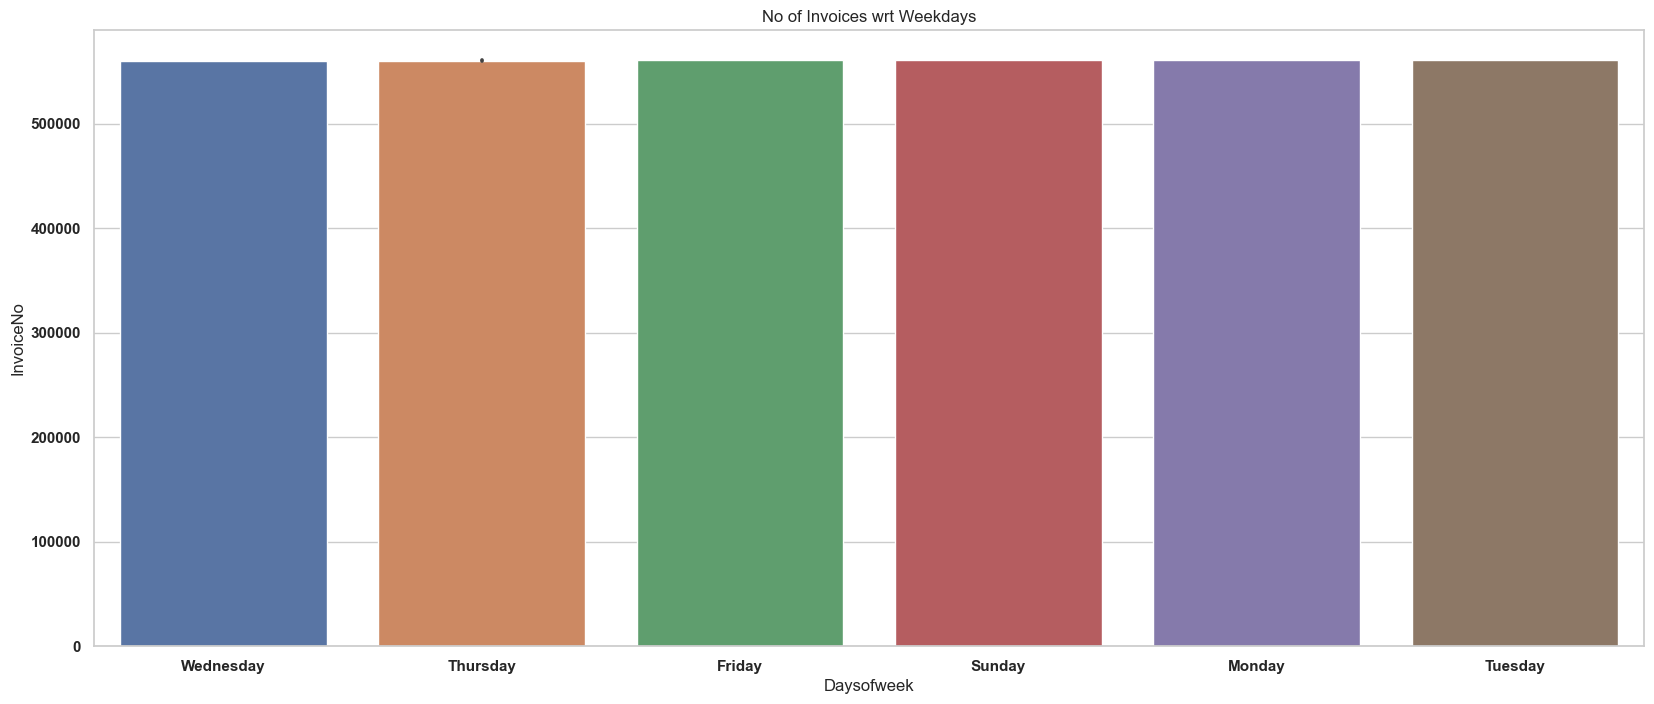

In [63]:
# Ensure InvoiceNo is numeric (if possible)
df['InvoiceNo'] = pd.to_numeric(df['InvoiceNo'], errors='coerce')

figsize = (20, 8)
f, ax = plt.subplots(1, 1, figsize=figsize)
ax = sns.barplot(ax=ax, x="Daysofweek", y="InvoiceNo", data=df).set_title('No of Invoices wrt Weekdays')

plt.show()


**Top 10 Expensive Products**

In [64]:
Exp = df.groupby('DigitStockCode', as_index=False)[['Description', 'UnitPrice']].max()


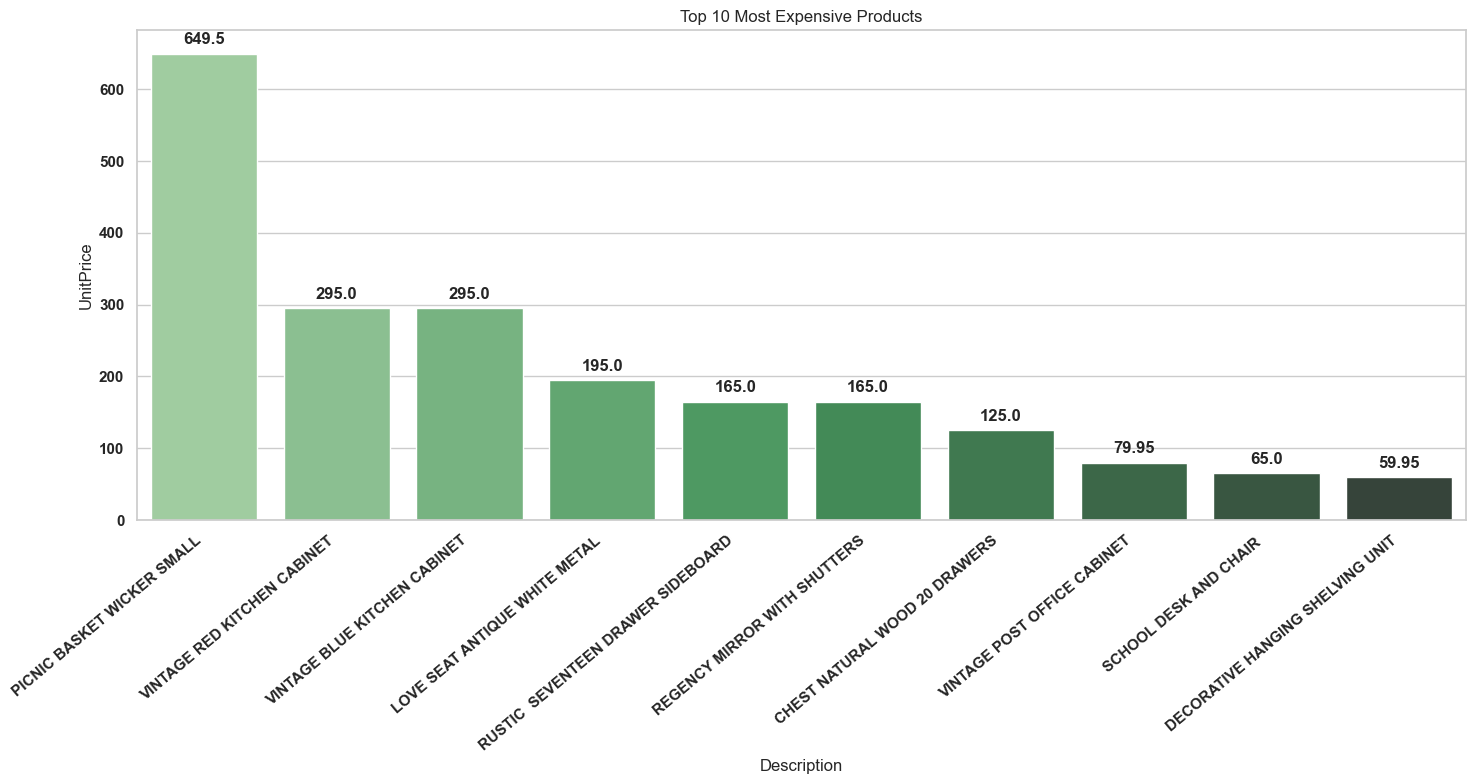

In [65]:
plt.figure(figsize=(15, 8))
plt.title('Top 10 Most Expensive Products')
splot = sns.barplot(x='Description',y='UnitPrice',palette="Greens_d" ,data=Exp.sort_values(by=('UnitPrice'),ascending=False).head(10))
for p in splot.patches:
        splot.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
splot.set_xticklabels(splot.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()


**Top 10 Countries with most Customers**

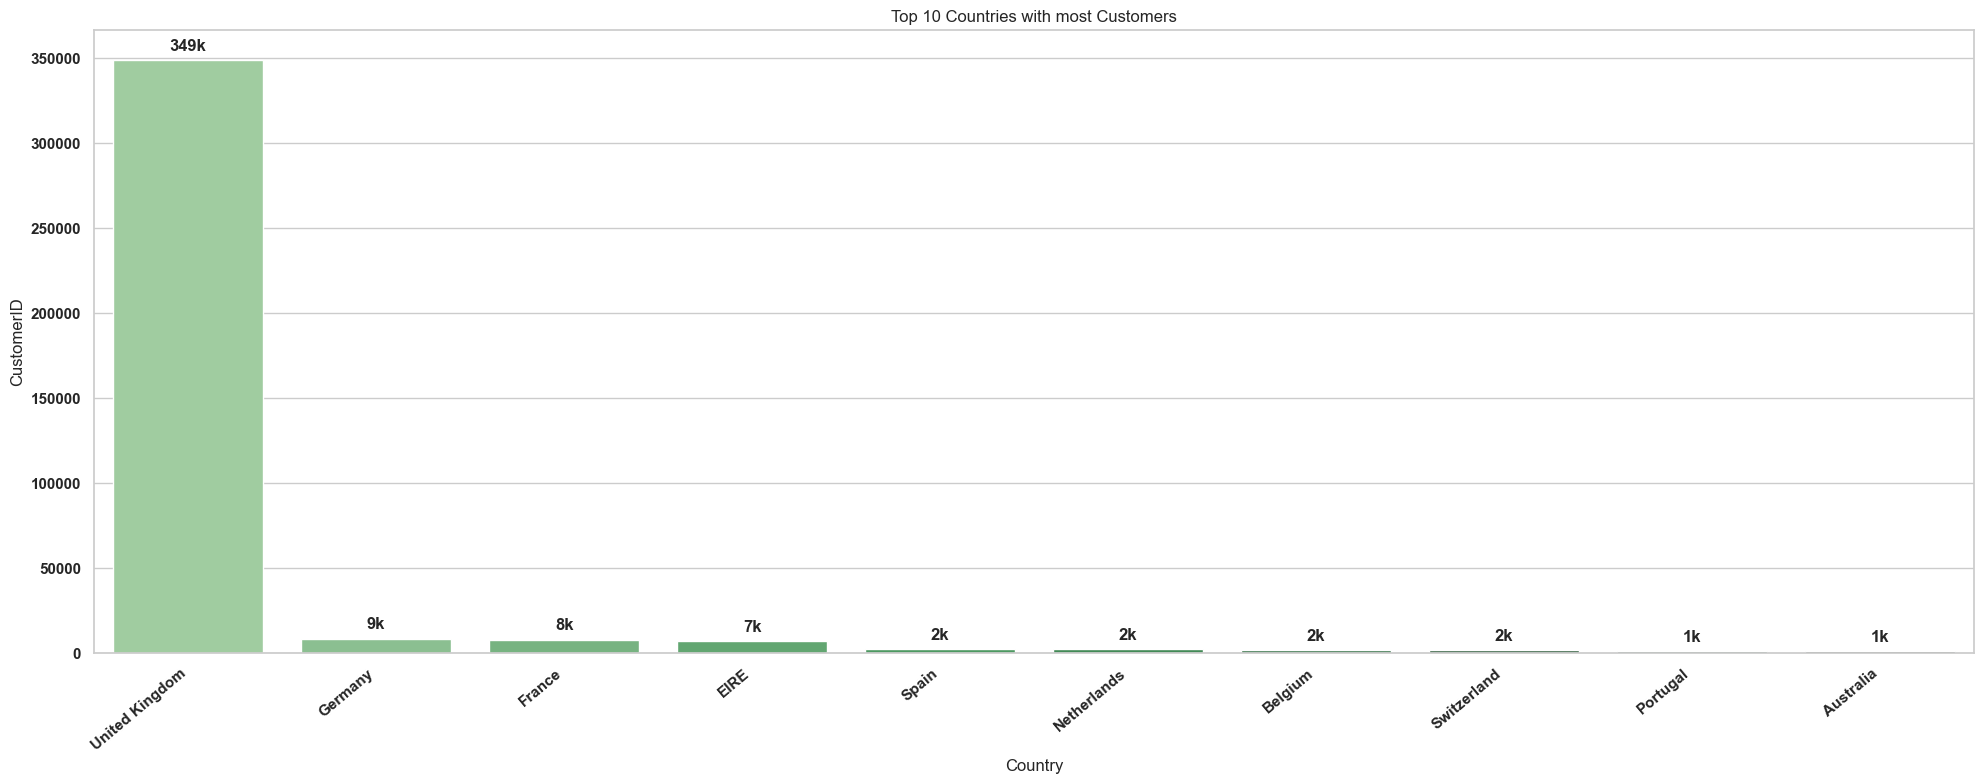

In [66]:
CountryCustomer=df.groupby(['Country'])['CustomerID'].count().nlargest(10).reset_index()
plt.figure(figsize=(20, 8))
plt.title('Top 10 Countries with most Customers')
splot = sns.barplot(x="Country",y='CustomerID',palette="Greens_d",data=CountryCustomer)
for p in splot.patches:
        splot.annotate(format(round(p.get_height()/1000))+'k', (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

splot.set_xticklabels(splot.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

**Top 10 Yearwise Customers W.R.T Countries**

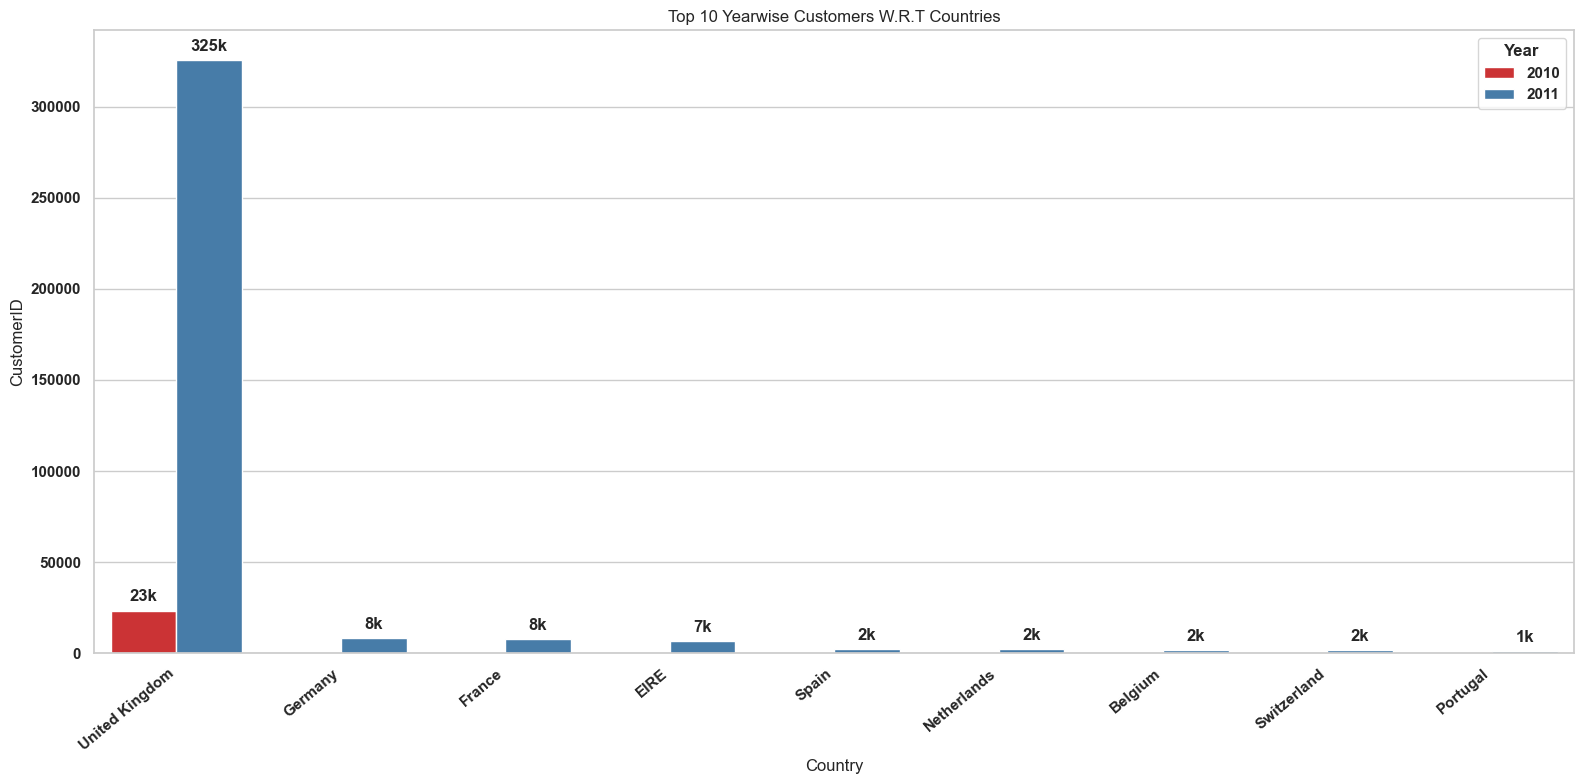

In [67]:
# Grouping the data
CountryCustomer = df.groupby(['Country', 'Year'])['CustomerID'].count().nlargest(10).reset_index()

# Plotting
plt.figure(figsize=(16, 8))
plt.title('Top 10 Yearwise Customers W.R.T Countries')
splot = sns.barplot(x="Country", y='CustomerID', hue='Year', palette='Set1', data=CountryCustomer)

# Adding annotations
for p in splot.patches:
    if p.get_height() > 0:
        splot.annotate(format(round(p.get_height() / 1000)) + 'k',
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center',
                       xytext=(0, 10), textcoords='offset points')

# Adjusting x-tick labels
splot.set_xticklabels(splot.get_xticklabels(), rotation=40, ha="right")

# Adjust layout and show plot
plt.tight_layout()
plt.show()


**Top 10 Countries with Highest Sales**

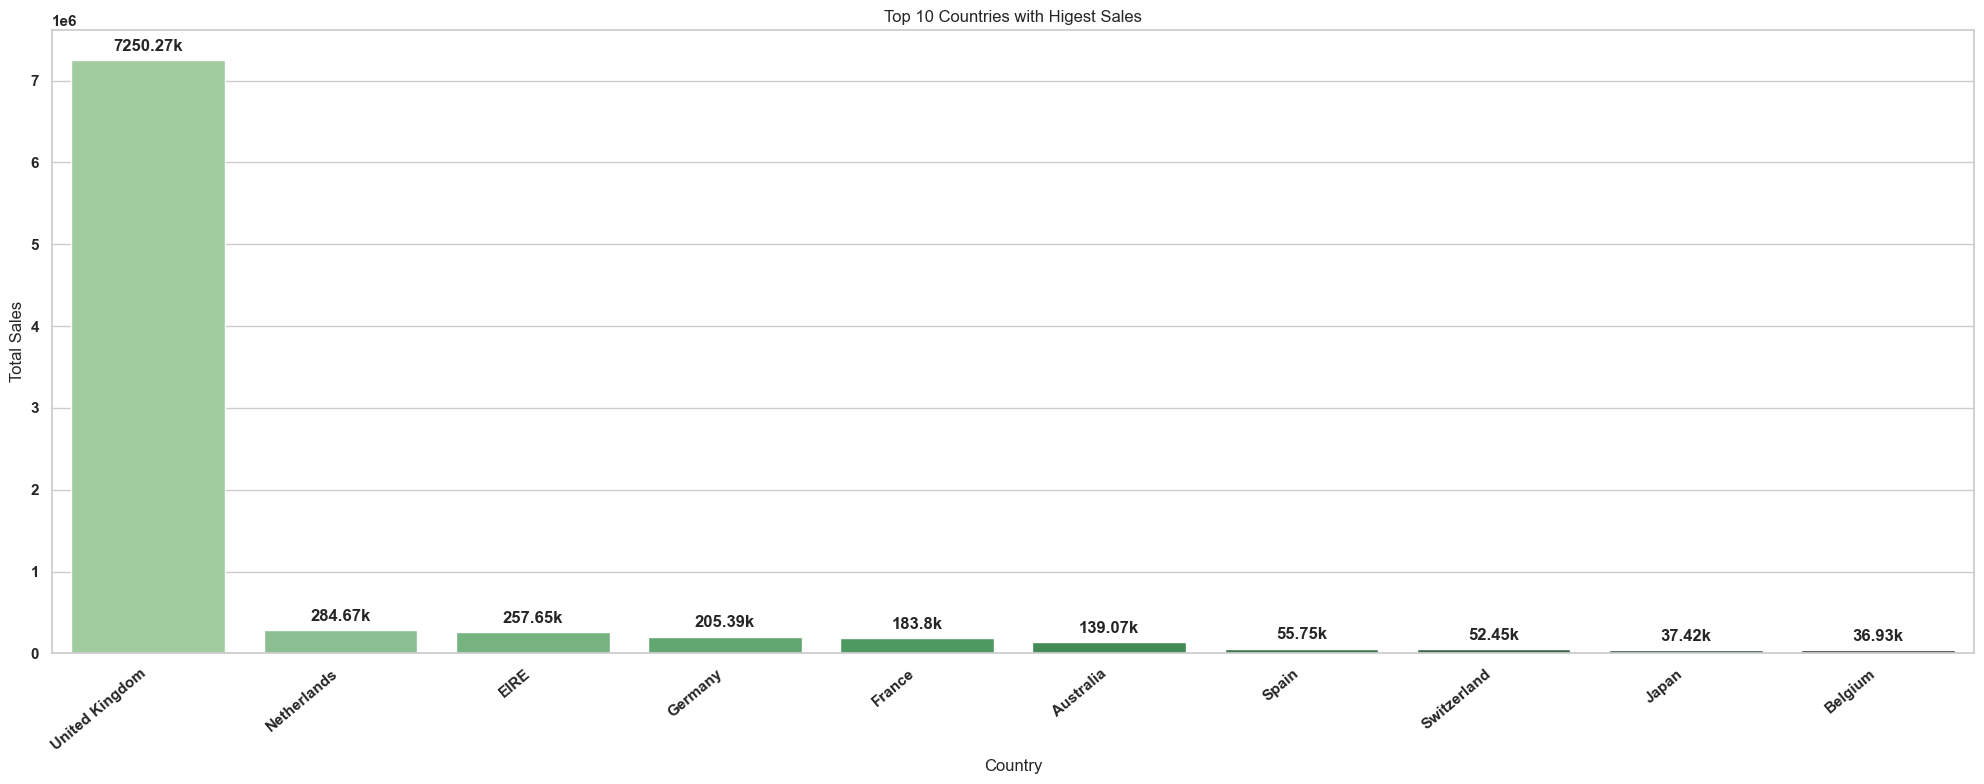

In [68]:
CountrySales=df.groupby(['Country'])['Total Sales'].sum().nlargest(10).reset_index()
plt.figure(figsize=(20, 8))
plt.title('Top 10 Countries with Higest Sales')
splot = sns.barplot(x="Country",y='Total Sales',palette="Greens_d",data=CountrySales)
for p in splot.patches:
        splot.annotate(format(round(p.get_height()/1000,2))+'k', (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

splot.set_xticklabels(splot.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

**Top 10 Yearwise Sales W.r.t Countries**



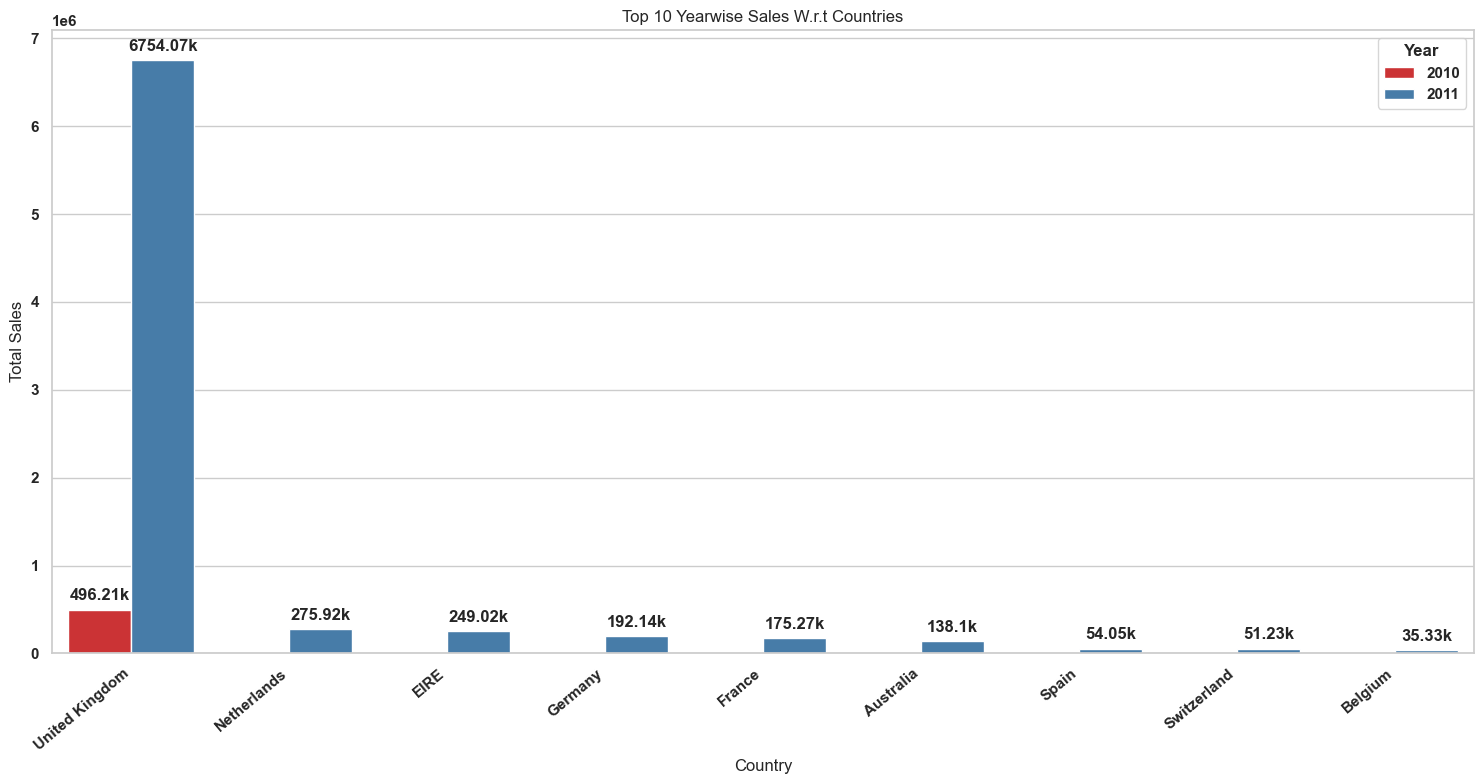

In [69]:
CountrySales=df.groupby(['Country','Year'])['Total Sales'].sum().nlargest(10).reset_index()
plt.figure(figsize=(15, 8))
plt.title('Top 10 Yearwise Sales W.r.t Countries')
splot = sns.barplot(x="Country",y='Total Sales',hue='Year',palette='Set1',data=CountrySales)
for p in splot.patches:
        splot.annotate(format(round(p.get_height()/1000,2))+'k', (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

splot.set_xticklabels(splot.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

**Top 10 Countries with Lowest Sales**

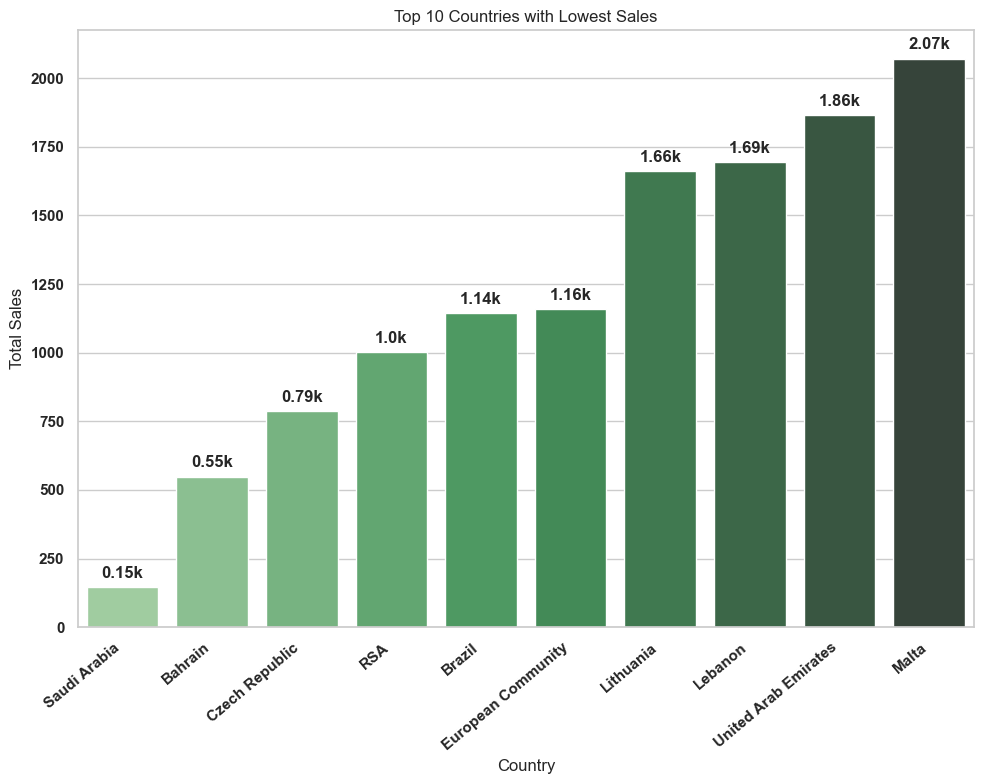

In [70]:
CountrySales=df.groupby(['Country'])['Total Sales'].sum().nsmallest(10).reset_index()
plt.figure(figsize=(10, 8))
plt.title('Top 10 Countries with Lowest Sales')
splot = sns.barplot(x="Country",y='Total Sales',palette="Greens_d",data=CountrySales)
for p in splot.patches:
        splot.annotate(format(round(p.get_height()/1000,2))+'k', (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

splot.set_xticklabels(splot.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

**Total Sale w.r.t Internation/Local**

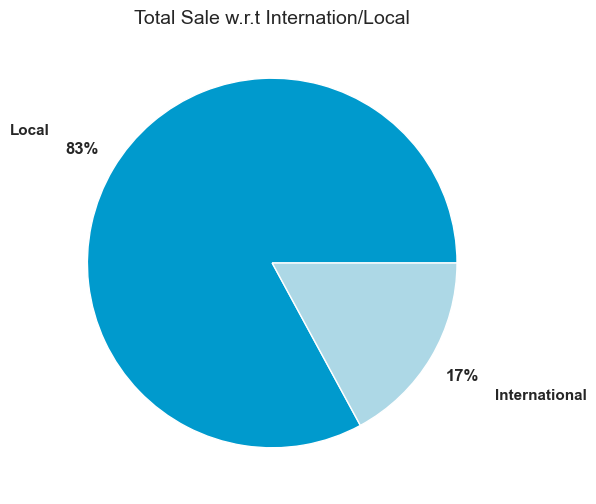

In [71]:

color_palette_list = ['#009ACD', '#ADD8E6', '#63D1F4', '#0EBFE9', 
                      '#C1F0F6', '#0099CC']
IntLocalSale=df.groupby('International Shipping/Service')['Total Sales'].sum()
pie, ax = plt.subplots(figsize=[10,6])
labels = ['Local','International']
plt.pie(x=IntLocalSale, labels=labels,colors=color_palette_list[0:2], autopct='%1.0f%%', shadow=False, startangle=0,pctdistance=1.2,labeldistance=1.4)
plt.title("Total Sale w.r.t Internation/Local", fontsize=14);

**Yearwise Retail Orders**

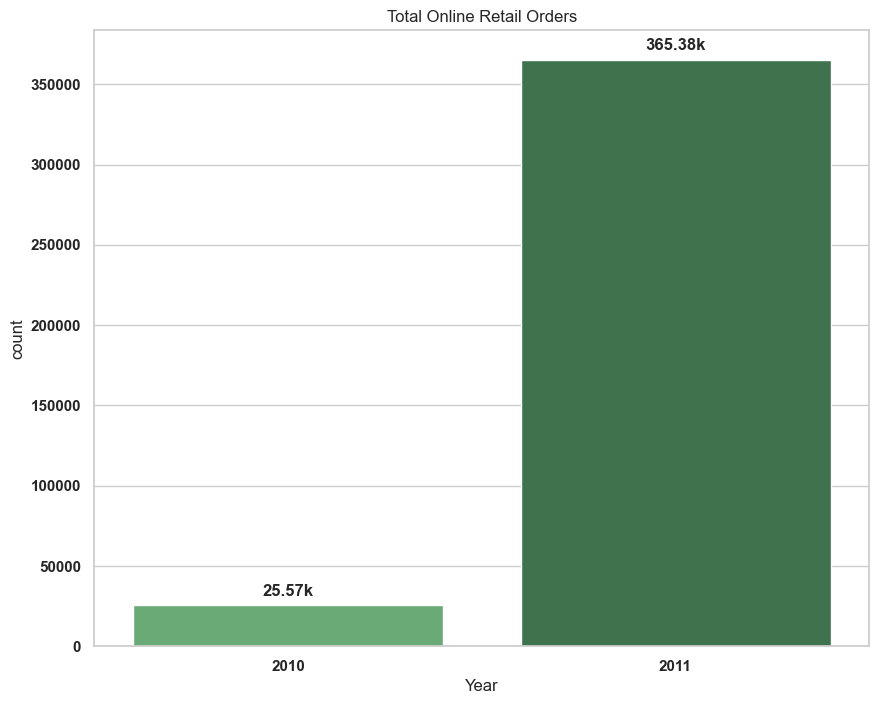

In [72]:
plt.figure(figsize=(10, 8))
plt.title('Total Online Retail Orders')
splot = sns.countplot(x='Year',data=df,palette="Greens_d")
for p in splot.patches:
        splot.annotate(format(round(p.get_height()/1000,2))+'k', (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

**Total Retails Orders In WeekDays**

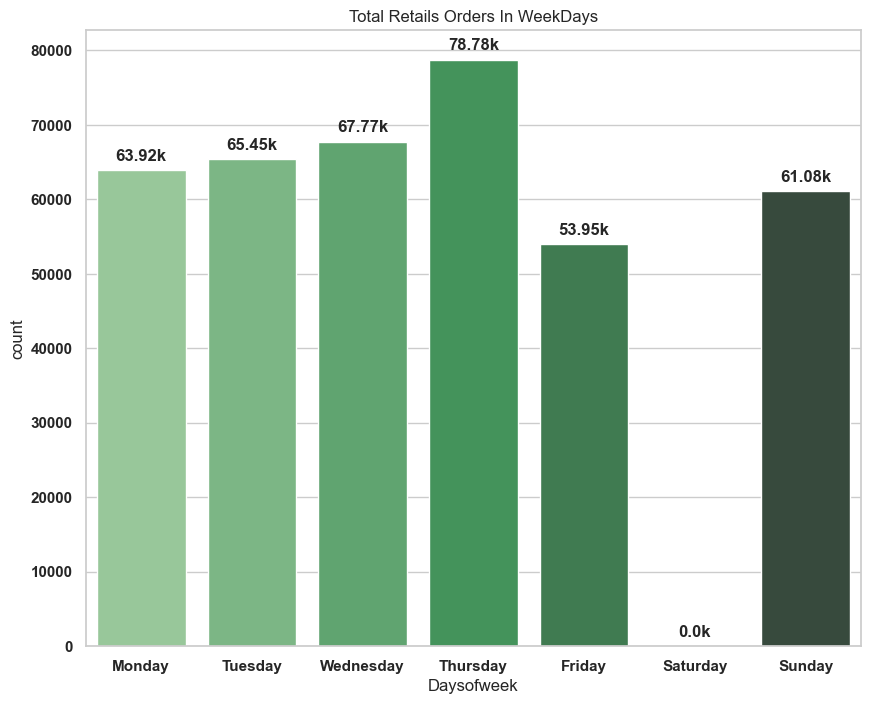

In [73]:
plt.figure(figsize=(10, 8))
plt.title('Total Retails Orders In WeekDays')
splot = sns.countplot(x='Daysofweek',order=WeekDays,palette="Greens_d",data=df)
for p in splot.patches:
        splot.annotate(format(round(p.get_height()/1000,2))+'k', (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

**Total Retail Orders In WeekDays of Each Year**

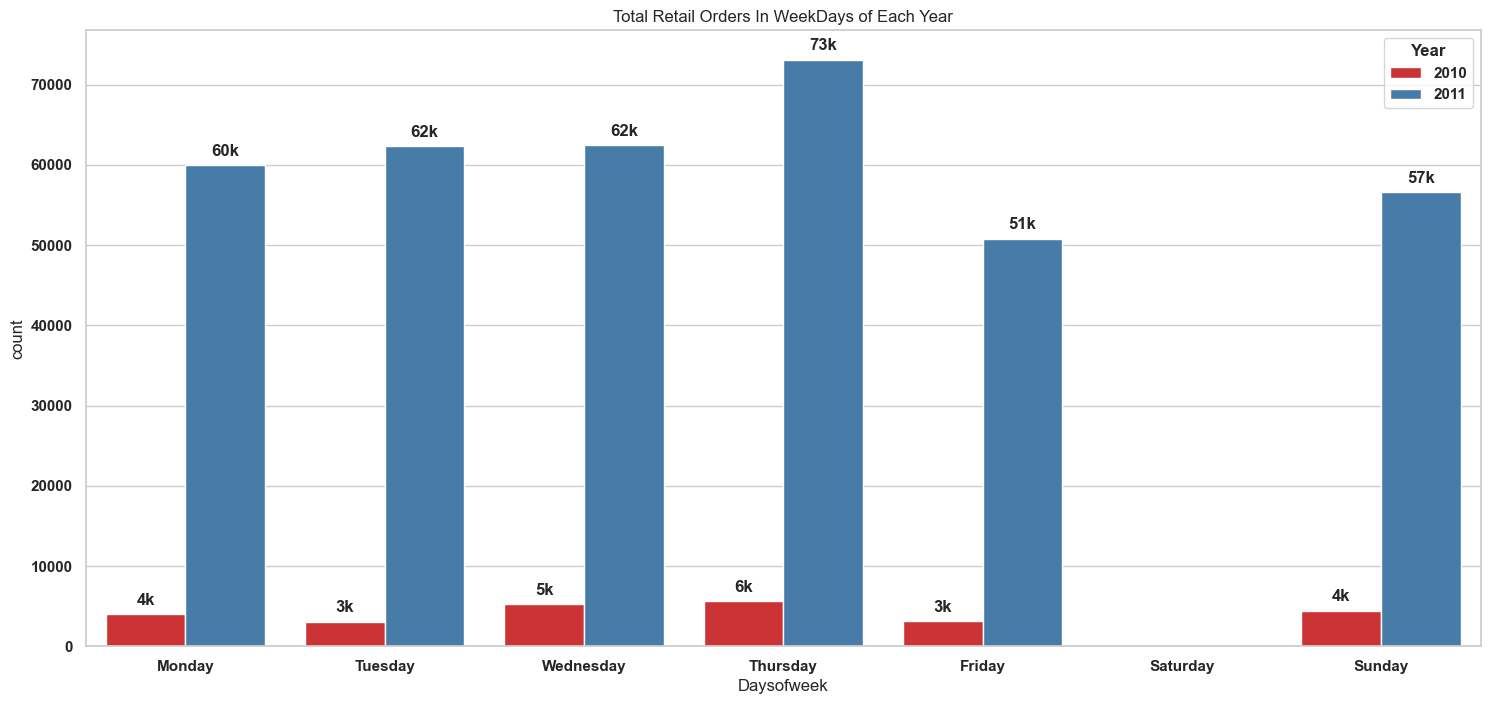

In [74]:
plt.figure(figsize=(18, 8))
plt.title('Total Retail Orders In WeekDays of Each Year')
splot = sns.countplot(x='Daysofweek',hue='Year',palette='Set1',order=WeekDays,data=df.sort_values(by=['Daysofweek']))
for p in splot.patches:
  if(p.get_height()>0):
    splot.annotate(format(round(p.get_height()/1000))+'k', (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')


**Total Retails Orders In each Month**

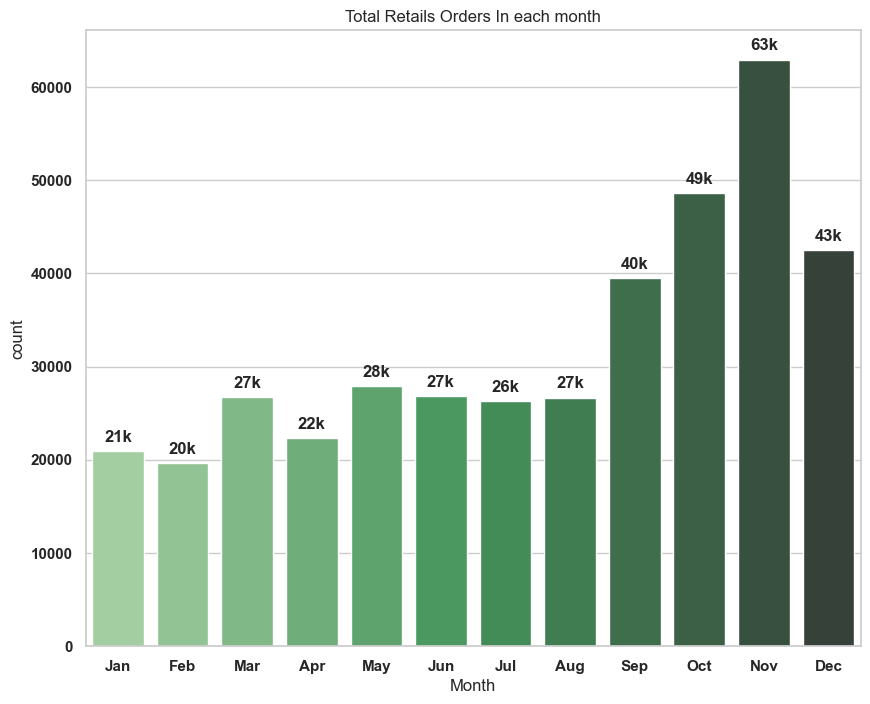

In [75]:
plt.figure(figsize=(10, 8))
plt.title('Total Retails Orders In each month')
splot = sns.countplot(x='Month',data=df,order=Months,palette='Greens_d')
for p in splot.patches:
        splot.annotate(format(round(p.get_height()/1000))+'k', (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

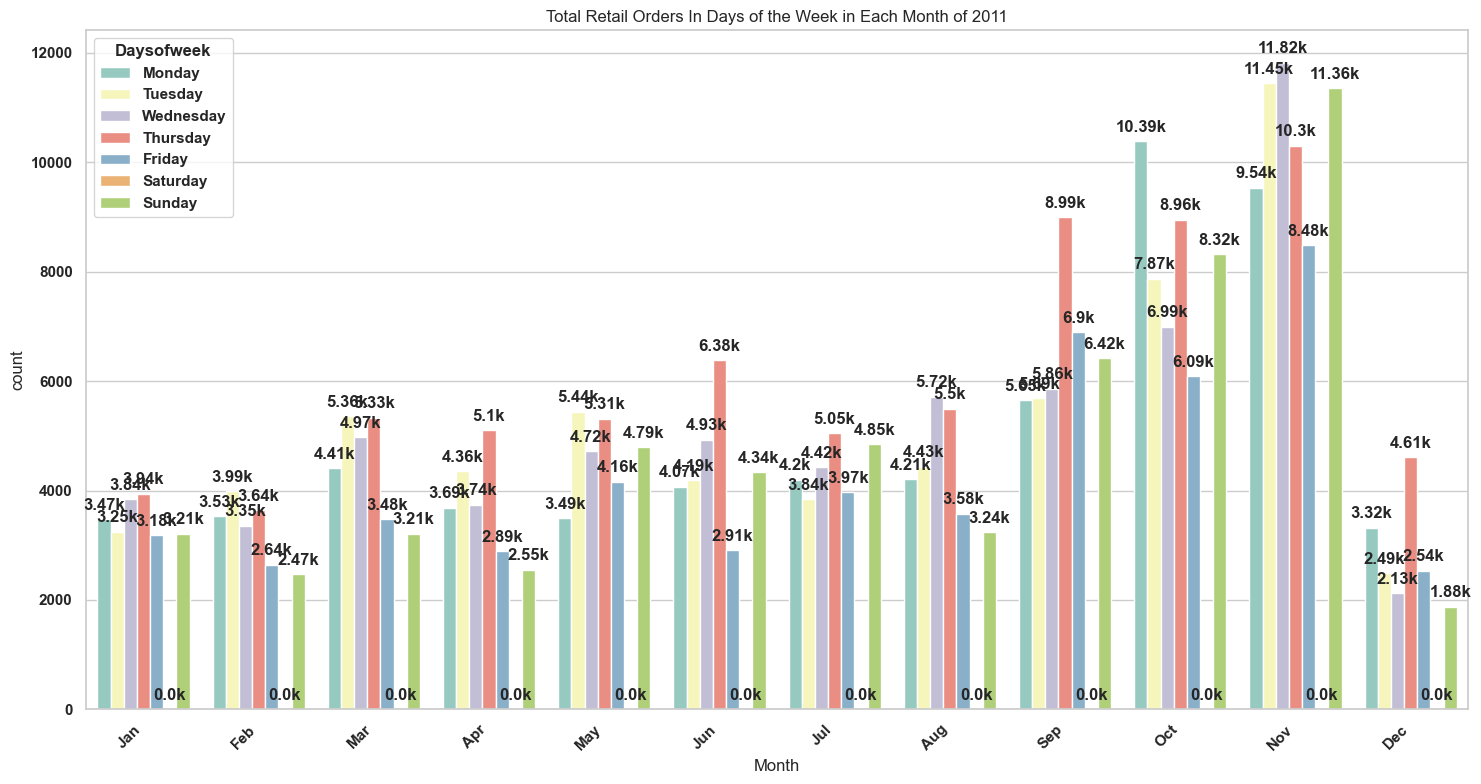

In [76]:
plt.figure(figsize=(15, 8))
plt.title('Total Retail Orders In Days of the Week in Each Month of 2011')

# Ensure that the data filtered for 2009 is valid
data_2011 = df[df['Year'] == 2011]

# Check if there are any records for 2009
if not data_2011.empty:
    # Create the countplot
    splot = sns.countplot(x='Month', hue='Daysofweek', data=data_2011, hue_order=WeekDays, palette='Set3')
    
    # Annotate the bars with counts
    for p in splot.patches:
        splot.annotate(format(round(p.get_height() / 1000, 2)) + 'k',
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points')

    # Rotate x-axis labels if necessary
    splot.set_xticklabels(splot.get_xticklabels(), rotation=45, ha="right")

    plt.tight_layout()
    plt.show()
else:
    print("No data available for the year 2011.")


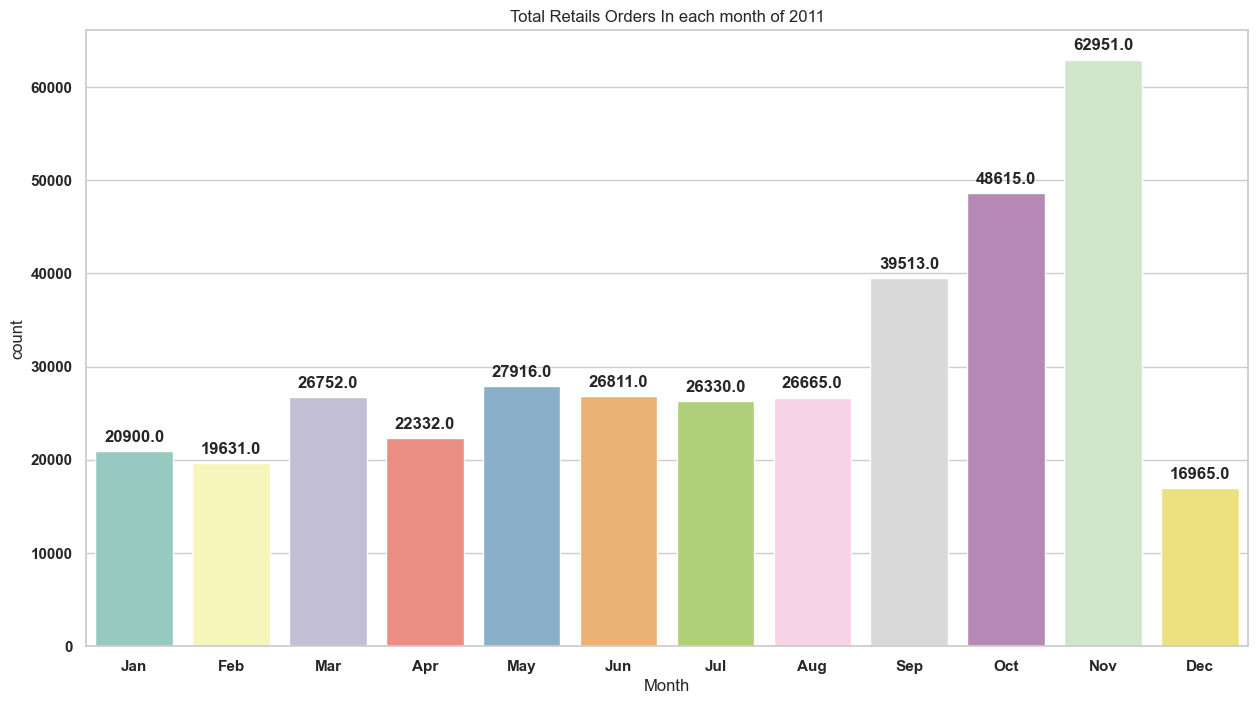

In [77]:
plt.figure(figsize=(15, 8))
plt.title('Total Retails Orders In each month of 2011')
splot = sns.countplot(x='Month',data=df[df['Year']==2011],order=Months,palette='Set3')
for p in splot.patches:
        splot.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

**Aggregated Sales per date**

C:\Users\chandan\AppData\Local\Temp\ipykernel_23972\3049808128.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  splot = sns.lineplot(x='Date', y='Total Sales', data=df.groupby('Date')['Total Sales'].sum().reset_index(),palette='Greens_d')


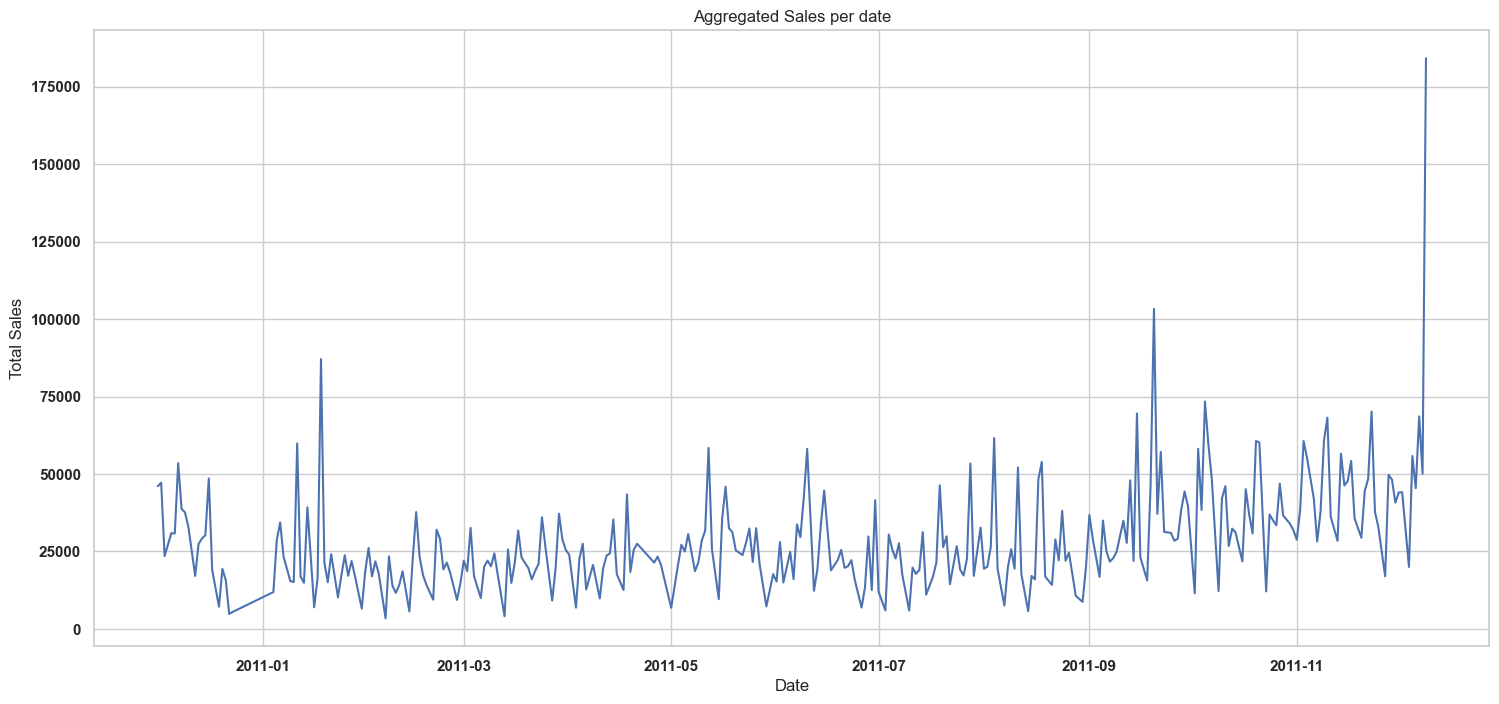

In [78]:

plt.figure(figsize=(18, 8))
plt.title('Aggregated Sales per date')
splot = sns.lineplot(x='Date', y='Total Sales', data=df.groupby('Date')['Total Sales'].sum().reset_index(),palette='Greens_d')

**Top 20 Items based on Quantity Sold**

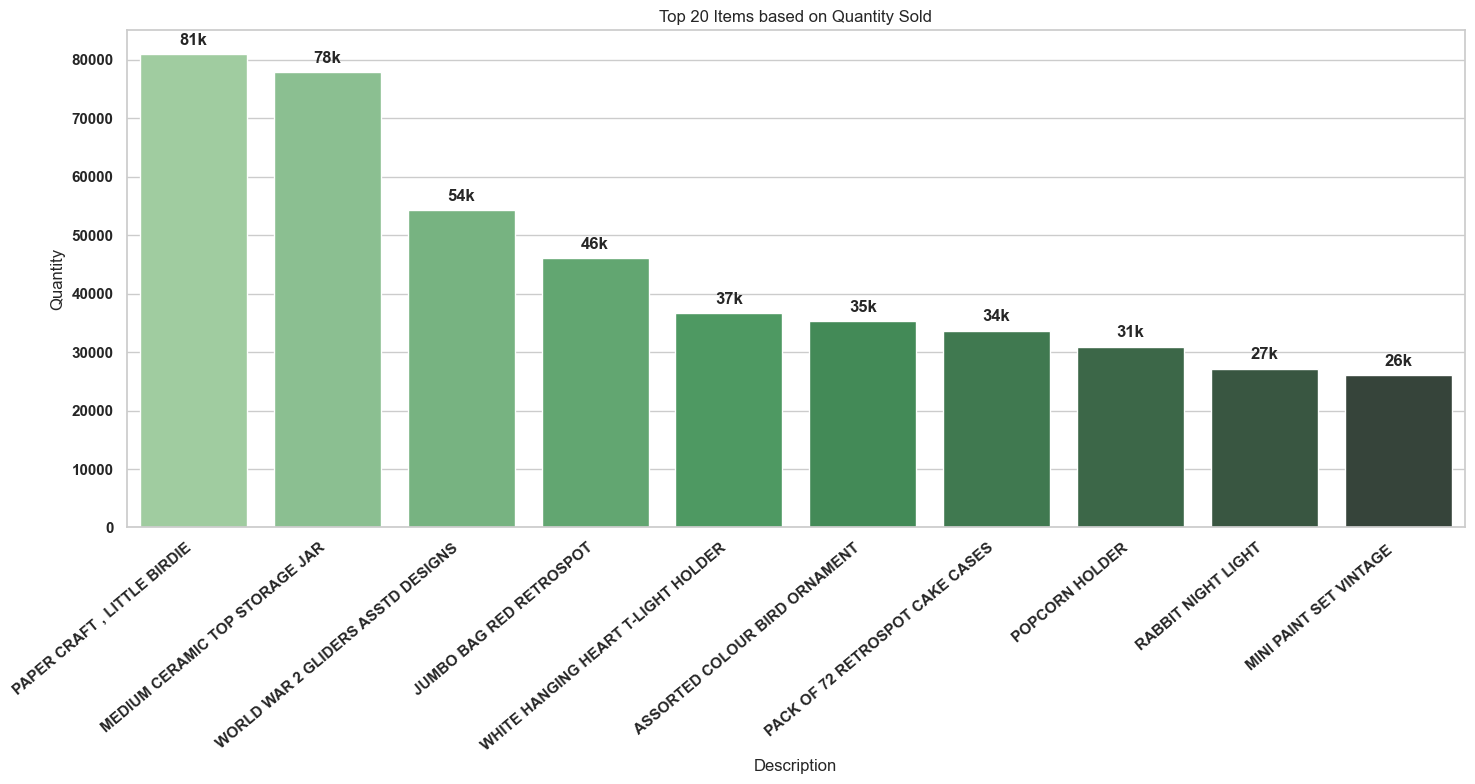

In [79]:
SoldItems=df.groupby(['DigitStockCode','Description'])['Quantity'].sum().sort_values(ascending=False).head(10).reset_index()
plt.figure(figsize=(15, 8))
plt.title('Top 20 Items based on Quantity Sold')
splot = sns.barplot(x='Description',y='Quantity',data=SoldItems,palette='Greens_d')
for p in splot.patches:
        splot.annotate(format(round(p.get_height()/1000))+'k', (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
splot.set_xticklabels(splot.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

**Top 10 Countries based on the Quantity Sold**

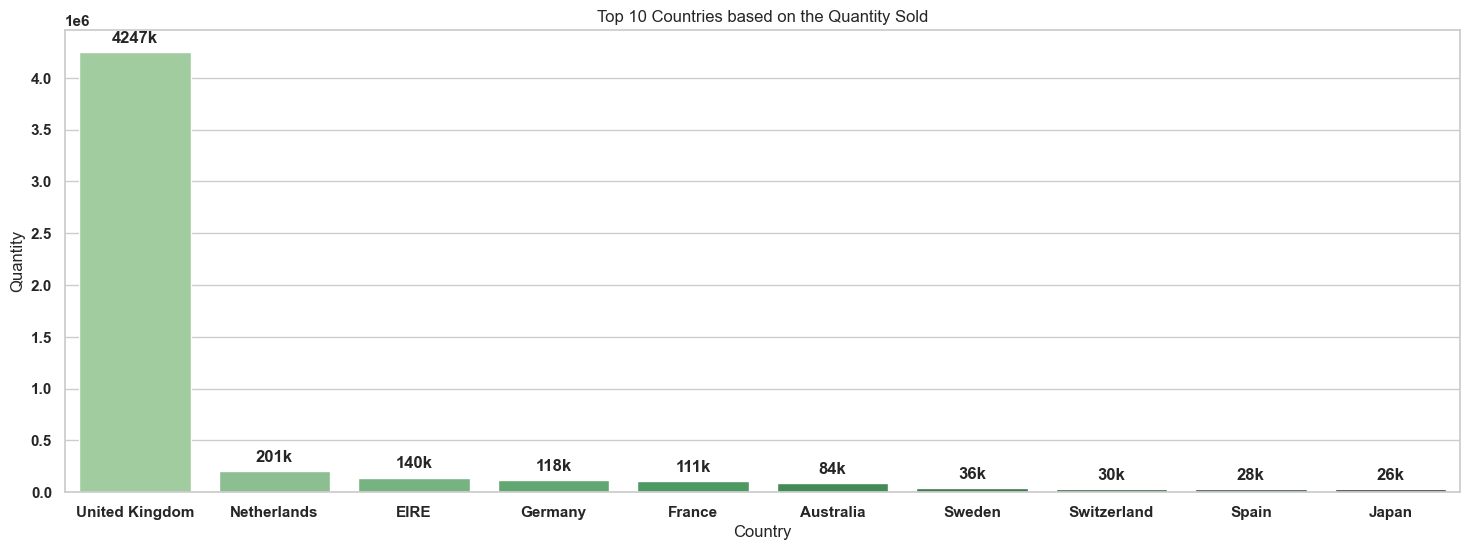

In [80]:
SoldItems=df.groupby(['Country'])['Quantity'].sum().sort_values(ascending=False).head(10).reset_index()
plt.figure(figsize=(18, 6))
plt.title('Top 10 Countries based on the Quantity Sold')
splot = sns.barplot(x='Country',y='Quantity',data=SoldItems,palette='Greens_d')
for p in splot.patches:
        splot.annotate(format(round(p.get_height()/1000))+'k', (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')


**Total Sales in hour**

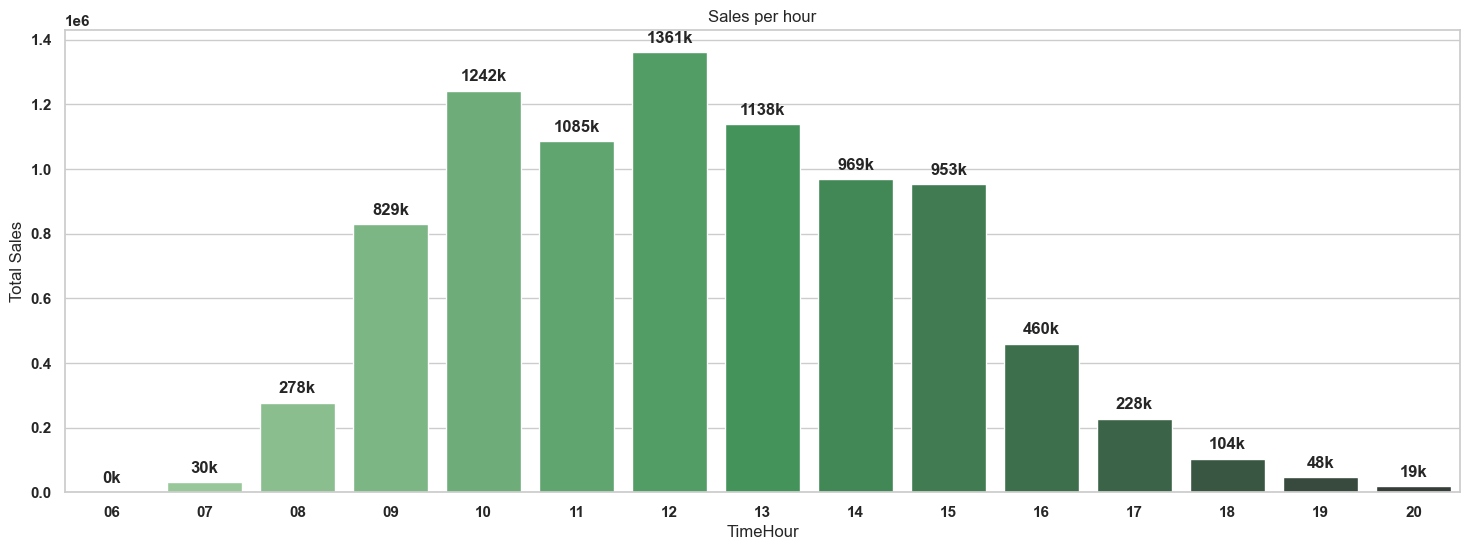

In [81]:
SoldItems=df.groupby(['TimeHour'])['Total Sales'].sum().reset_index()
plt.figure(figsize=(18, 6))
plt.title('Sales per hour')
splot = sns.barplot(x='TimeHour',y='Total Sales',data=SoldItems,palette='Greens_d')
for p in splot.patches:
        splot.annotate(format(round(p.get_height()/1000))+'k', (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')


**Top items by top sales hours**

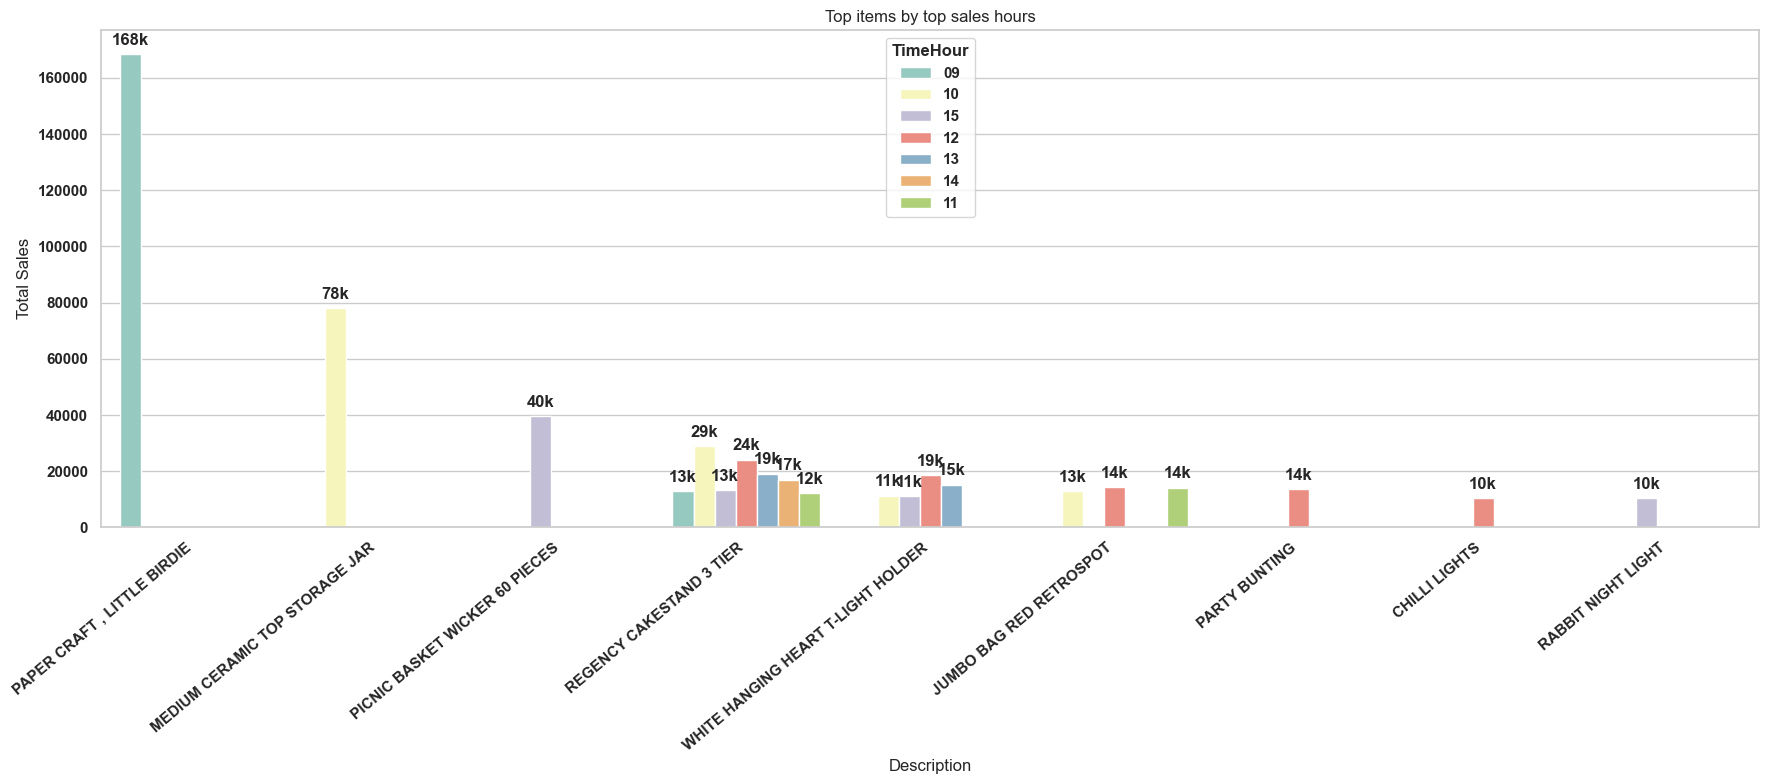

In [82]:
SoldItems=df.groupby(['TimeHour','Description'])['Total Sales'].sum().reset_index()

plt.figure(figsize=(18, 8))
plt.title('Top items by top sales hours')
splot = sns.barplot(x='Description' ,hue='TimeHour',y='Total Sales',data=SoldItems.sort_values('Total Sales',ascending=False).head(20),palette='Set3')
for p in splot.patches:
    if(p.get_height()>0):
      splot.annotate(format(round(p.get_height()/1000))+'k', (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

splot.set_xticklabels(splot.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

**Mapping and Ranking items Quantity Sold in each country**

In [83]:
import folium
from folium.plugins import MarkerCluster
#empty map
world_map= folium.Map(tiles="cartodbpositron")
title_html = '''<h3 align="center" style="font-size:16px"><b>Mapping and Ranking items Quantity Sold in each country</b></h3>'''
world_map.get_root().html.add_child(folium.Element(title_html))
marker_cluster = MarkerCluster().add_to(world_map)
CountryQuantity=df.groupby(['Country','Latitude','Longitude'])['Quantity'].sum().sort_values(ascending=False).reset_index()
#for each coordinate, create circlemarker of user percent
for index, row in CountryQuantity.iterrows():
        lat = CountryQuantity.loc[index,'Latitude']
        long =CountryQuantity.loc[index,'Longitude']
        radius=5
        
        popup_text = """Country : {}<br>
                    Sold items Quantity: {}<br>
                    Sold Quantity Ranking:{}"""
        popup_text = popup_text.format(CountryQuantity.loc[index,'Country'],
                                   CountryQuantity.loc[index,'Quantity'],index+1
                                   )
        iframe = folium.IFrame(popup_text,width=250,height=60)
        popup = folium.Popup(iframe,max_width=250)
        folium.CircleMarker(location = [lat, long], radius=radius, popup= popup, fill =True).add_to(marker_cluster)
#show the map
world_map


**Time Series Analysis**

In [84]:
! pip install pmdarima

In [85]:
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf 
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller


In [86]:
Timedata=df.groupby('Date',as_index=True)['Total Sales'].sum()
Timedata=pd.DataFrame(Timedata)
Timedata.index=pd.to_datetime(Timedata.index)

<Axes: xlabel='Date'>

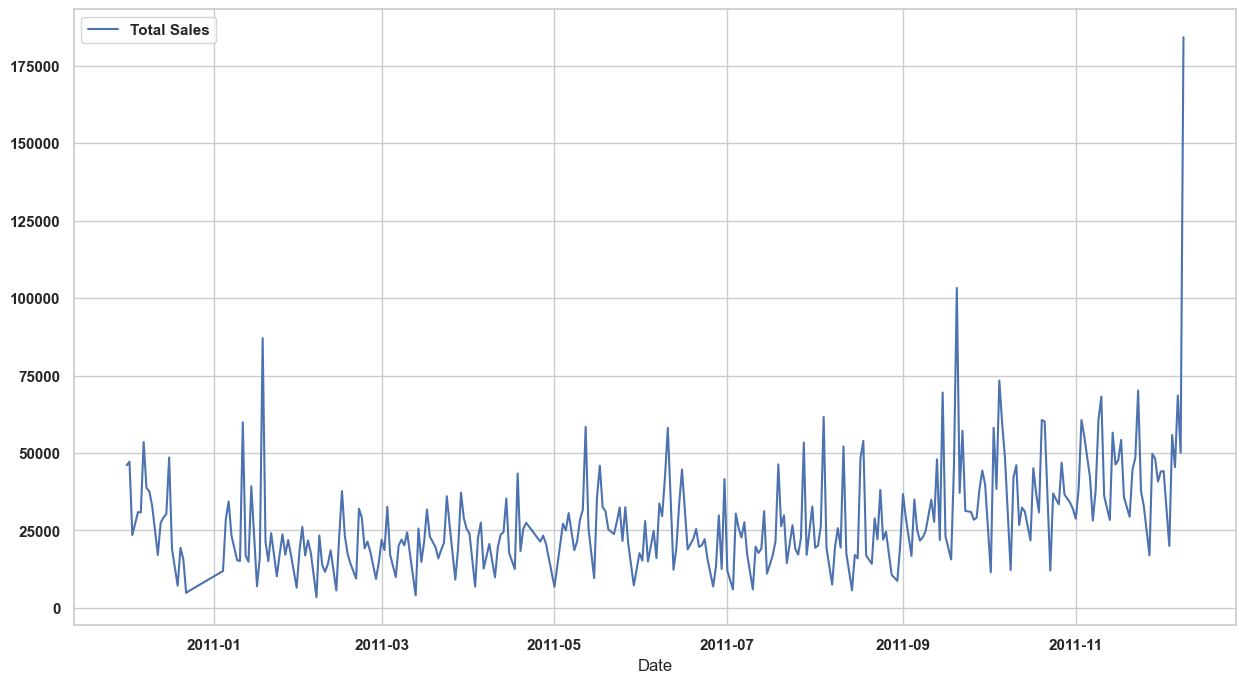

In [87]:
plt.figure(figsize=(15,8))
sns.lineplot(data=Timedata)

In [88]:
#Using Augmented Dickey Fuller Test (ADF Test)
result = adfuller(Timedata['Total Sales'].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Lags Used: ',result[2])
print("Number of observation used : ",result[3])
print("Critical Value ",result[4])

ADF Statistic: -0.135481
p-value: 0.945788
Lags Used:  12
Number of observation used :  292
Critical Value  {'1%': -3.4529449243622383, '5%': -2.871489553425686, '10%': -2.572071437887033}


In [89]:
Timedata['Sales Lag']=Timedata['Total Sales'].shift(1)
Timedata['First_Difference']=Timedata['Total Sales']-Timedata['Sales Lag']
Timedata.head()

,Total Sales,Sales Lag,First_Difference
Date,,,
2010-12-01,46035.29,NaN,NaN
2010-12-02,47179.57,46035.29,1144.28
2010-12-03,23530.93,47179.57,-23648.64
2010-12-05,30913.28,23530.93,7382.35
2010-12-06,30807.90,30913.28,-105.38


In [90]:
# Graphical Analysis
Timedata['First_Difference'].plot(figsize=(10,5))

<Axes: xlabel='Date'>

MemoryError: In RendererAgg: Out of memory

<Figure size 1000x500 with 1 Axes>

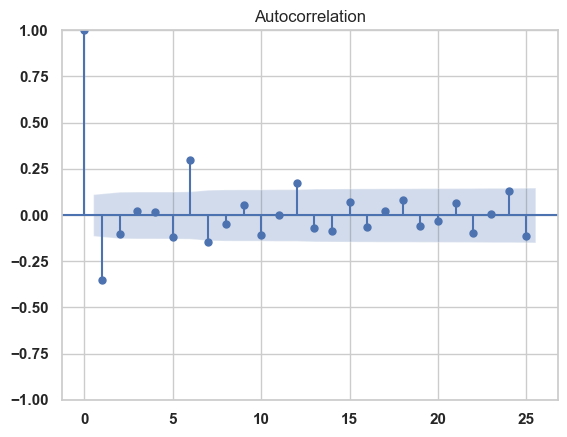

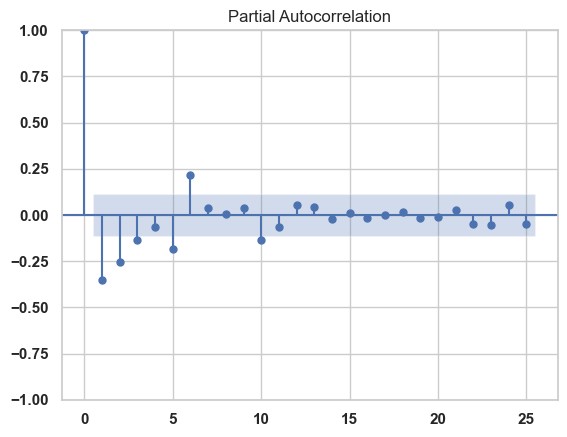

In [91]:
# using ACF and PACF
plot_acf(Timedata['First_Difference'].dropna())
plot_pacf(Timedata['First_Difference'].dropna())
pyplot.show()

In [92]:
#Using Augmented Dickey Fuller Test (ADF Test)
result = adfuller(Timedata['First_Difference'].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Lags Used: ',result[2])
print("Number of observation used : ",result[3])
print("Critical Value ",result[4])

ADF Statistic: -6.370472
p-value: 0.000000
Lags Used:  11
Number of observation used :  292
Critical Value  {'1%': -3.4529449243622383, '5%': -2.871489553425686, '10%': -2.572071437887033}


The p-value is obtained less than than significance level of 0.05 and the ADF statistic is lower than any of the critical values. Clearly, there is no reason to reject the null hypothesis. So, the time series is in fact stationary at first difference

**Figure Out Order of ARIMA Model**

In [93]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Fit the ARIMA model
model = ARIMA(Timedata['Total Sales'], order=(0, 0, 2))
model_fit = model.fit()

# Print the model summary
print(model_fit.summary())




                               SARIMAX Results                                
Dep. Variable:            Total Sales   No. Observations:                  305
Model:                 ARIMA(0, 0, 2)   Log Likelihood               -3399.612
Date:                Wed, 23 Oct 2024   AIC                           6807.223
Time:                        10:42:08   BIC                           6822.104
Sample:                             0   HQIC                          6813.175
                                - 305                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.867e+04   1662.323     17.247      0.000    2.54e+04    3.19e+04
ma.L1          0.3059      0.068      4.469      0.000       0.172       0.440
ma.L2          0.1243      0.055      2.258      0.0

c:\Users\chandan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\chandan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\chandan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


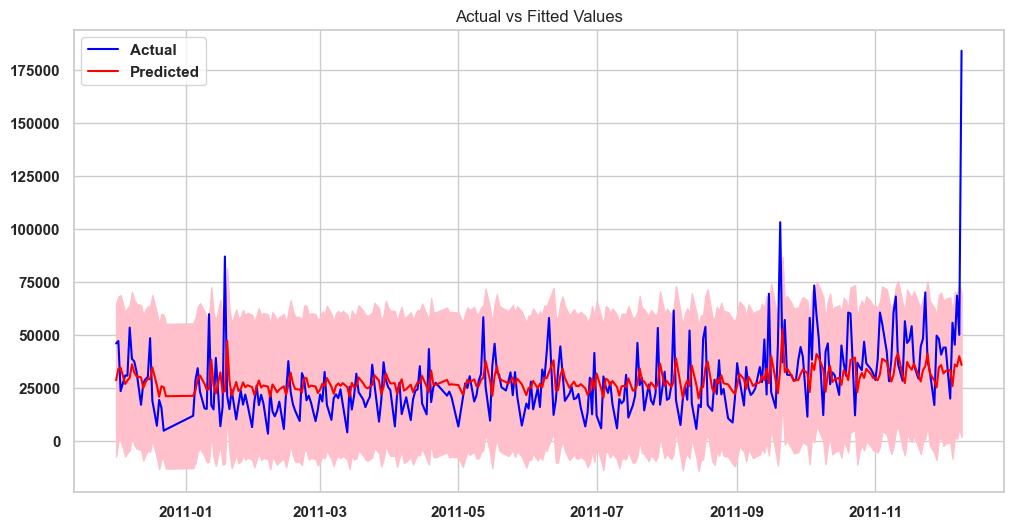

In [94]:
# Get predicted values
predicted = model_fit.get_prediction(start=pd.to_datetime(Timedata['Total Sales'].index[0]), 
                                      end=pd.to_datetime(Timedata['Total Sales'].index[-1]), 
                                      dynamic=False)

# Extract the predicted mean and confidence intervals
predicted_mean = predicted.predicted_mean
confidence_intervals = predicted.conf_int()

# Plot actual vs fitted
plt.figure(figsize=(12, 6))
plt.plot(Timedata['Total Sales'], label='Actual', color='blue')
plt.plot(predicted_mean, label='Predicted', color='red')
plt.fill_between(confidence_intervals.index, 
                 confidence_intervals.iloc[:, 0], 
                 confidence_intervals.iloc[:, 1], color='pink')
plt.title('Actual vs Fitted Values')
plt.legend()
plt.show()

In [95]:
# Evaluation Metrics
actual = Timedata['Total Sales'][predicted_mean.index]  # Ensure alignment with the actual data

# Mean Squared Error (MSE)
mse = np.mean((actual - predicted_mean) ** 2)

# Mean Absolute Error (MAE)
mae = np.mean(np.abs(actual - predicted_mean))

# Symmetric Mean Absolute Percentage Error (SMAPE)
smape = 100 * np.mean(np.abs(actual - predicted_mean) / ((np.abs(actual) + np.abs(predicted_mean)) / 2))

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Print evaluation metrics
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Symmetric Mean Absolute Percentage Error (SMAPE): {smape}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Squared Error (MSE): 280318766.5946666
Mean Absolute Error (MAE): 11334.864655291149
Symmetric Mean Absolute Percentage Error (SMAPE): 40.080629501989634
Root Mean Squared Error (RMSE): 16742.722795133013


In [96]:
!pip install statsmodels --upgrade

**Residual errors**

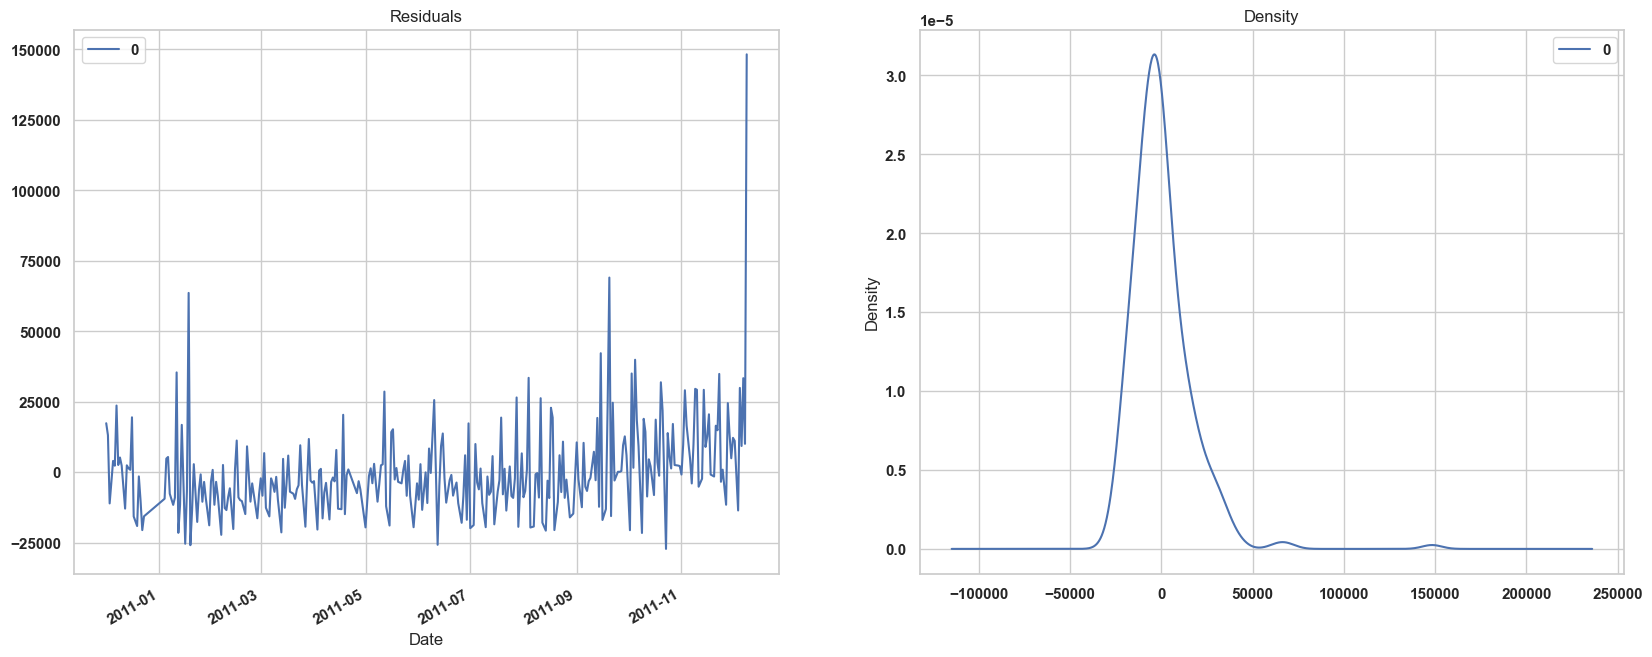

In [97]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,8)
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

 **Customer Segmentation using RFM Analysis**

Recency, Frequency, Monetary (RFM) is a marketing tool that uses historical transactions to group your clients into meaningful categories. It uses three factors:

Recency: How many days ago was their last purchase?
Frequency: How many times has the customer purchased from our store?
Monetary: How much the customer spent?

To conduct you RFM analysis, the first step is to rank the three variables with a score of 1 (low) to 5(important). With the variable frequency, score 1 will gather 20% of people who come less, whereas 5 means the customers who shop the most frequently. Once you assess all the rank, you concatenate them. It assigns a three-digit RFM score (from 111 to 555) to each customer. A 555 indicates that a customer has purchased a product or service very recently, most frequently, and at the highest monetary value.



In [98]:
rfm=df.copy()

In [99]:
#Because we are looking at the customer and not the product we drop InvoiceNo and Stcokcode
ab = df.groupby('CustomerID').agg({'InvoiceDate': 'min','Total Sales': 'sum'})
ab.rename(columns={'InvoiceDate': "Recency",('InvoiceDate', 'nunique'): "Frequency","Total Sales": 'Monetization'},  inplace = True)
frequency = df.groupby('CustomerID').agg({'InvoiceDate':'nunique'})
frequency.rename(columns={'InvoiceDate': "Frequency"}, inplace = True)

rfm = pd.merge(ab,frequency, on='CustomerID')

#rfm.rename(columns={('InvoiceDate',     'min'): "Recency",('InvoiceDate', 'nunique'): "Frequency","Total Sales": 'Monetization'})

In [100]:
a = rfm.reset_index()

In [101]:
rfm.rename(columns={'InvoiceDate': "Recency",'InvoiceDate': "Frequency","Total Sales": 'Monetization'})

,Recency,Monetization,Frequency
CustomerID,,,
12346.0,1/18/2011 10:01,77183.60,1
12347.0,1/26/2011 14:30,4310.00,7
12348.0,1/25/2011 10:42,1437.24,4
12349.0,11/21/2011 9:51,1457.55,1
12350.0,2/2/2011 16:01,294.40,1
...,...,...,...
18280.0,3/7/2011 9:52,180.60,1
18281.0,6/12/2011 10:53,80.82,1
18282.0,12/2/2011 11:43,178.05,2


In [102]:
rfm.describe()

,Monetization,Frequency
count,4332.000000,4332.000000
mean,2018.573396,4.228070
std,8917.017734,7.579832
min,3.750000,1.000000
25%,303.960000,1.000000
50%,663.710000,2.000000
75%,1633.912500,5.000000
max,279923.480000,207.000000


In [103]:
#We save the most recent date to, then , calulate the recency
e = df['InvoiceDate'].min()
print('minimun :'+ str(e))

minimun :1/10/2011 10:32


In [104]:
rfm.info()


<class 'pandas.core.frame.DataFrame'>
Float64Index: 4332 entries, 12346.0 to 18287.0
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Recency       4332 non-null   object 
 1   Monetization  4332 non-null   float64
 2   Frequency     4332 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 135.4+ KB


In [105]:
# Ensure that both rfm['Recency'] and 'e' are in datetime format
rfm['Recency'] = pd.to_datetime(rfm['Recency'], errors='coerce')  # Coerce invalid parsing to NaT
e = pd.to_datetime(e)

# Calculate the difference in days between the date in Recency and 'e'
rfm['Recency'] = rfm['Recency'].apply(lambda x: (x - e).days if pd.notnull(x) else None)

# Display the updated rfm DataFrame to check the result
print(rfm[['Recency']].head())


            Recency
CustomerID         
12346.0           7
12347.0          16
12348.0          15
12349.0         314
12350.0          23


**Now we are going to create the rank with 5 class**


In [106]:

rfm['Rank_Recency'] = pd.qcut( rfm['Recency'],q=5, labels = range(6, 1, -1))
rfm['Rank_Recency'] = pd.to_numeric(rfm['Rank_Recency'])

In [107]:
def freq(x):
    if x ==1:
        return 1
    elif x == 2:
        return 2
    elif x == 3:
        return 3
    elif x == 4:
        return 4
    else: 
        return 5

rfm['Rank_Frequency'] =rfm['Frequency'].apply(freq)

In [108]:
rfm['Rank_Monetization'] = pd.qcut( rfm['Monetization'],q=5, labels = range(1, 6, 1))
rfm['Rank_Monetization'] = pd.to_numeric(rfm['Rank_Monetization'])

In [109]:
rfm['RFM_Score'] = rfm['Rank_Recency'].astype(str)+ rfm['Rank_Frequency'].astype(str) + rfm['Rank_Monetization'].astype(str)
rfm['Score'] = rfm['Rank_Recency']+ rfm['Rank_Frequency']+ rfm['Rank_Monetization']

In [110]:
rfm.describe()

,Recency,Monetization,Frequency,Rank_Recency,Rank_Frequency,Rank_Monetization,Score
count,4332.000000,4332.000000,4332.000000,4332.000000,4332.000000,4332.000000,4332.000000
mean,175.720222,2018.573396,4.228070,4.013389,2.712835,3.000000,9.726223
std,129.094741,8917.017734,7.579832,1.414477,1.614896,1.414703,3.260466
min,-41.000000,3.750000,1.000000,2.000000,1.000000,1.000000,4.000000
25%,31.000000,303.960000,1.000000,3.000000,1.000000,2.000000,7.000000
50%,246.000000,663.710000,2.000000,4.000000,2.000000,3.000000,9.000000
75%,291.000000,1633.912500,5.000000,5.000000,5.000000,4.000000,12.000000
max,333.000000,279923.480000,207.000000,6.000000,5.000000,5.000000,16.000000


In [111]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 4332 entries, 12346.0 to 18287.0
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Recency            4332 non-null   int64  
 1   Monetization       4332 non-null   float64
 2   Frequency          4332 non-null   int64  
 3   Rank_Recency       4332 non-null   int64  
 4   Rank_Frequency     4332 non-null   int64  
 5   Rank_Monetization  4332 non-null   int64  
 6   RFM_Score          4332 non-null   object 
 7   Score              4332 non-null   int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 304.6+ KB


**Creating Client segments**

In [112]:
def client_segment(x):
    if x == 15:
        return 'Champions'
    elif  x >= 14:
        return 'Loyal Customers'
    elif  x >= 11:
        return 'Can’t Lose Them'
    elif  x >= 9:
        return 'Potential Loyalist'
    elif  x >= 7:
        return 'Promising'
    elif  x >= 6:
        return 'Needs Attention'
    elif  x >= 5:
        return 'At Risk'
    else:
        return 'Lost'

In [113]:
rfm['Clients'] = rfm['Score'].apply(client_segment)

In [114]:
rfm

,Recency,Monetization,Frequency,Rank_Recency,Rank_Frequency,Rank_Monetization,RFM_Score,Score,Clients
CustomerID,,,,,,,,,
12346.0,7,77183.60,1,6,1,5,615,12,Can’t Lose Them
12347.0,16,4310.00,7,6,5,5,655,16,Loyal Customers
12348.0,15,1437.24,4,6,4,4,644,14,Loyal Customers
12349.0,314,1457.55,1,2,1,4,214,7,Promising
12350.0,23,294.40,1,5,1,2,512,8,Promising
...,...,...,...,...,...,...,...,...,...
18280.0,55,180.60,1,5,1,1,511,7,Promising
18281.0,153,80.82,1,4,1,1,411,6,Needs Attention
18282.0,326,178.05,2,2,2,1,221,5,At Risk


In [115]:
clients = rfm[['Clients', 'Frequency', 'Monetization', 'Recency']].groupby('Clients').median()
clients.reset_index(inplace = True)

Text(0.5, 1.0, 'Median Visits')

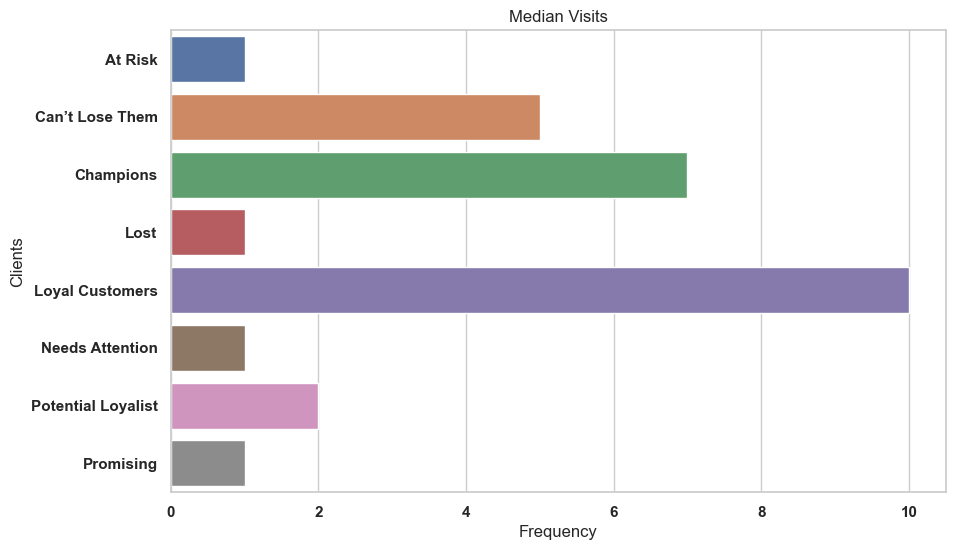

In [116]:
plt.rcParams["figure.figsize"] = (10,6)
ax = sns.barplot(x="Frequency", y="Clients", data=clients)
ax.set_ylabel('Clients')
ax.set_title('Median Visits')

Text(0.5, 1.0, 'Median Expenditure')

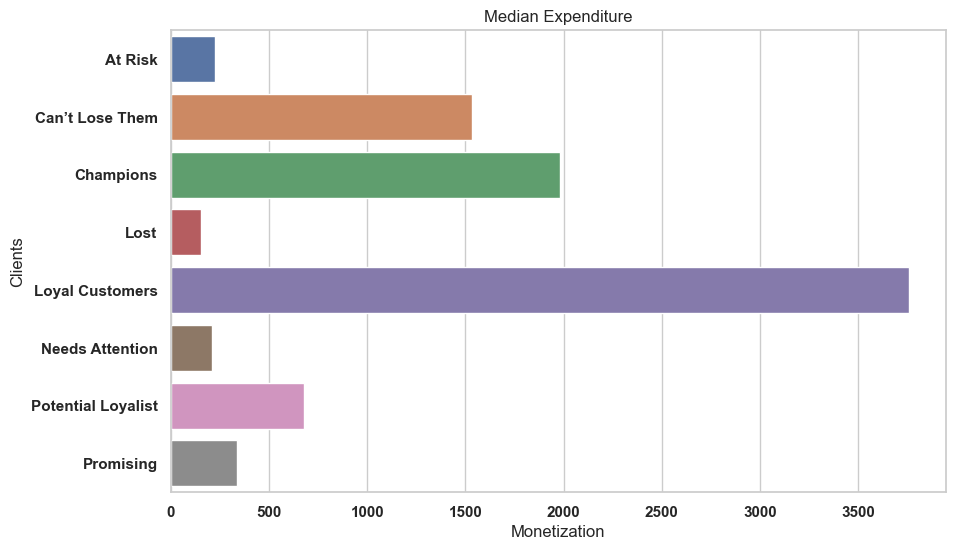

In [117]:
ax = sns.barplot(x="Monetization", y="Clients", data=clients)
ax.set_ylabel('Clients')
ax.set_title('Median Expenditure')

Text(0.5, 1.0, 'Median time from last shop ')

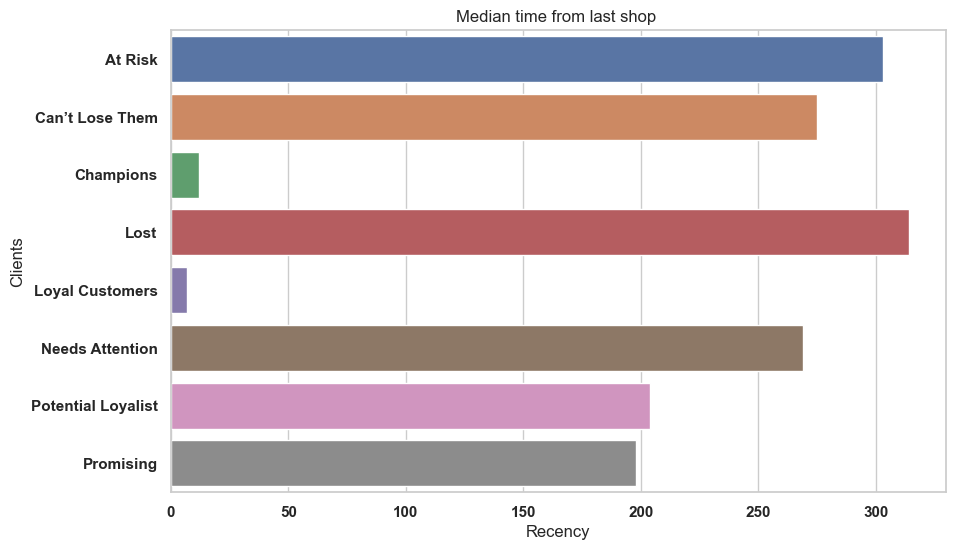

In [118]:
ax = sns.barplot(x="Recency", y="Clients", data=clients)
ax.set_ylabel('Clients')
ax.set_title('Median time from last shop ')

In [119]:
rfm['Clients'].unique()

array(['Can’t Lose Them', 'Loyal Customers', 'Promising',
       'Potential Loyalist', 'Champions', 'Lost', 'Needs Attention',
       'At Risk'], dtype=object)

In [120]:
!pip install squarify

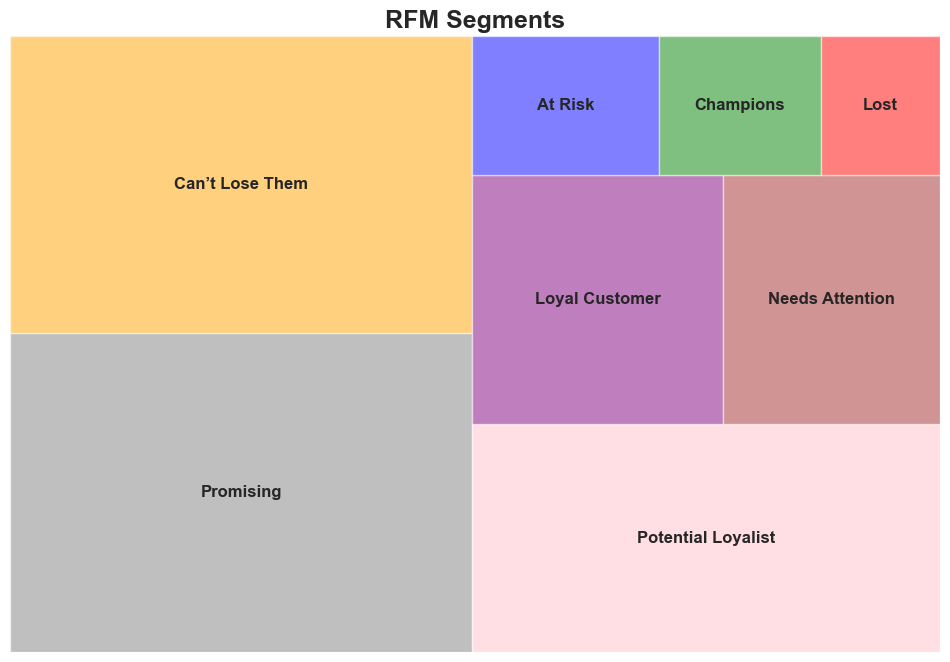

In [121]:
import squarify

# Count the occurrences of each segment in the 'Clients' column
squarity = rfm['Clients'].value_counts()

# Adjust colors to match the number of segments
color = ['grey', 'orange', 'pink', 'purple', 'brown', 'blue', 'green', 'red']

# Ensure the number of labels matches the number of segments
labels = ['Promising',
          'Can’t Lose Them',
          'Potential Loyalist',
          'Loyal Customer',
          'Needs Attention',
          'At Risk',
          'Champions',
          'Lost']

# Create the plot
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(12, 8)

# Use squarify to plot
squarify.plot(sizes=squarity, 
              label=labels, 
              color=color, 
              alpha=0.5)

# Add title and remove axis
plt.title("RFM Segments", fontsize=18, fontweight="bold")
plt.axis('off')

# Show plot
plt.show()


In [122]:
squarity

Promising             1115
Can’t Lose Them       1038
Potential Loyalist     806
Loyal Customers        473
Needs Attention        409
At Risk                196
Champions              170
Lost                   125
Name: Clients, dtype: int64

Interpretation

We have a deeper understanding of our segmentations from the graphs above, from the median expenditure to each group's number. Among the visualization, we observe three horizontal histograms (median frequency, median monetization and median recency for every group of clients) and one squarity.

As we can see in the Median Expenditure graph, our two best categories of clients are champions (in green) and loyal customer(in purple). As we can see, both clients provide almost 80% of our revenue and only represent 22% of our total clients! This follows the 80/20 rule, also known as the Pareto Principle, attributed to the Italian economist Vilfredo Pareto.

This is a presentation of the three different users:

Champions gather 523 customer who has a median expenditure of $3381 and comes almost every month. For marketers, they should be the most critical clients because they make your market sustainable. In this case, you must regularly reward with the promotion or provide to them privilege access.

Potential Loyalist represents 807 of our customers. They play an essential role in the growth of the market. They already show interest in the brand. The next step is to acquire them by building a relationship.

Customers that need attention constitutes 10% of our market. They spend and come below the average. We translated this with a potential loss, increased churn. It is vital to reactive interest with discounts and recommendations. Moreover, you may also receive feedback to improve your process.

In [123]:
# Select only numeric columns from the rfm DataFrame
numeric_rfm = rfm.select_dtypes(include=['float64', 'int64'])

# Calculate quantiles for the numeric columns
quantiles = numeric_rfm.quantile(q=[0.25, 0.50, 0.75])

# Convert quantiles to dictionary format
quantiles_dict = quantiles.to_dict()

print(quantiles_dict)


{'Recency': {0.25: 31.0, 0.5: 246.0, 0.75: 291.0}, 'Monetization': {0.25: 303.96000000000004, 0.5: 663.71, 0.75: 1633.9125}, 'Frequency': {0.25: 1.0, 0.5: 2.0, 0.75: 5.0}, 'Rank_Recency': {0.25: 3.0, 0.5: 4.0, 0.75: 5.0}, 'Rank_Frequency': {0.25: 1.0, 0.5: 2.0, 0.75: 5.0}, 'Rank_Monetization': {0.25: 2.0, 0.5: 3.0, 0.75: 4.0}, 'Score': {0.25: 7.0, 0.5: 9.0, 0.75: 12.0}}


In [124]:
rfm_segments= rfm

In [125]:
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def RClass(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def FMClass(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [126]:
rfm_segments['R_Quartile'] = rfm_segments['Recency'].apply(RClass, args=('Recency',quantiles,))
rfm_segments['F_Quartile'] = rfm_segments['Frequency'].apply(FMClass, args=('Frequency',quantiles,))
rfm_segments['M_Quartile'] = rfm_segments['Monetization'].apply(FMClass, args=('Monetization',quantiles,))

In [127]:
rfm_segments['RFMClass'] = rfm_segments.R_Quartile.map(str) \
                            + rfm_segments.F_Quartile.map(str) \
                            + rfm_segments.M_Quartile.map(str)

In [128]:
rfm_segments.head(10)

,Recency,Monetization,Frequency,Rank_Recency,Rank_Frequency,Rank_Monetization,RFM_Score,Score,Clients,R_Quartile,F_Quartile,M_Quartile,RFMClass
CustomerID,,,,,,,,,,,,,
12346.0,7,77183.60,1,6,1,5,615,12,Can’t Lose Them,1,4,1,141
12347.0,16,4310.00,7,6,5,5,655,16,Loyal Customers,1,1,1,111
12348.0,15,1437.24,4,6,4,4,644,14,Loyal Customers,1,2,2,122
12349.0,314,1457.55,1,2,1,4,214,7,Promising,4,4,2,442
12350.0,23,294.40,1,5,1,2,512,8,Promising,1,4,4,144
12352.0,297,1385.74,7,3,5,4,354,12,Can’t Lose Them,4,1,2,412
12353.0,129,89.00,1,5,1,1,511,7,Promising,2,4,4,244
12354.0,101,1079.40,1,5,1,4,514,10,Potential Loyalist,2,4,2,242
12355.0,119,459.40,1,5,1,2,512,8,Promising,2,4,3,243


In [129]:
print("Always Returing Customers: ",len(rfm_segments[rfm_segments['RFMClass']=='111']),
      "(", round(len(rfm_segments[rfm_segments['RFMClass']=='111'])/len(rfm_segments)*100,2), "%)") 
print('Loyal Customers: ',len(rfm_segments[rfm_segments['F_Quartile']==1]),
      "(", round(len(rfm_segments[rfm_segments['F_Quartile']==1])/len(rfm_segments)*100,2), "%)")
print("Customer with Higher Power of Purchase: ",len(rfm_segments[rfm_segments['M_Quartile']==1]), 
      "(", round(len(rfm_segments[rfm_segments['M_Quartile']==1])/len(rfm_segments)*100,2), "%)")
print('Potiential Churners: ', len(rfm_segments[rfm_segments['RFMClass']=='322']),
      "(", round(len(rfm_segments[rfm_segments['RFMClass']=='322'])/len(rfm_segments)*100,2), "%)")
print('Churners: ',len(rfm_segments[rfm_segments['RFMClass']=='444']), 
      "(", round(len(rfm_segments[rfm_segments['RFMClass']=='444'])/len(rfm_segments)*100,2), "%)")


Always Returing Customers:  364 ( 8.4 %)
Loyal Customers:  861 ( 19.88 %)
Customer with Higher Power of Purchase:  1083 ( 25.0 %)
Potiential Churners:  160 ( 3.69 %)
Churners:  177 ( 4.09 %)


In [130]:
clients

,Clients,Frequency,Monetization,Recency
0,At Risk,1.0,222.880,303.0
1,Can’t Lose Them,5.0,1530.600,275.0
2,Champions,7.0,1981.450,12.0
3,Lost,1.0,152.950,314.0
4,Loyal Customers,10.0,3756.330,7.0
5,Needs Attention,1.0,208.650,269.0
6,Potential Loyalist,2.0,678.205,204.0
7,Promising,1.0,335.520,198.0


In [131]:
rfm['Clients'].value_counts()

Promising             1115
Can’t Lose Them       1038
Potential Loyalist     806
Loyal Customers        473
Needs Attention        409
At Risk                196
Champions              170
Lost                   125
Name: Clients, dtype: int64

 **Clustering**



**Clustering** split your data set into several groups. The group are formed of similar data point compared to the other group. We can use this approach for marketing segmentation, medical imaging, and anomaly detection. They are different types of clustering methods, including:

1)Partitioning methods.
2)Hierarchical clustering
3)Fuzzy clustering
4)Density-based clustering
5)Model-based clustering

Analogy:

You had a box of apples of different colors; red, green, and mixed colors. Individually picking each color would not only consume time but is likely to entail manifestations of human error. However, with cluster analysis, we can segment these different apples according to color. With such information, one can harvest information such as how many apples belong to which color, which color is of the best quality, or which color has the least quality.

In [132]:
rfm.head(5)

,Recency,Monetization,Frequency,Rank_Recency,Rank_Frequency,Rank_Monetization,RFM_Score,Score,Clients,R_Quartile,F_Quartile,M_Quartile,RFMClass
CustomerID,,,,,,,,,,,,,
12346.0,7,77183.60,1,6,1,5,615,12,Can’t Lose Them,1,4,1,141
12347.0,16,4310.00,7,6,5,5,655,16,Loyal Customers,1,1,1,111
12348.0,15,1437.24,4,6,4,4,644,14,Loyal Customers,1,2,2,122
12349.0,314,1457.55,1,2,1,4,214,7,Promising,4,4,2,442
12350.0,23,294.40,1,5,1,2,512,8,Promising,1,4,4,144


In [133]:
cluster = rfm.drop(['Rank_Recency','Rank_Frequency','Rank_Monetization','RFM_Score','Score','Clients'], axis = 1)

In [134]:
cluster.head(5)

,Recency,Monetization,Frequency,R_Quartile,F_Quartile,M_Quartile,RFMClass
CustomerID,,,,,,,
12346.0,7,77183.60,1,1,4,1,141
12347.0,16,4310.00,7,1,1,1,111
12348.0,15,1437.24,4,1,2,2,122
12349.0,314,1457.55,1,4,4,2,442
12350.0,23,294.40,1,1,4,4,144


 **K-means clustering algorithm**


K-means is one of the most straightforward clustering analysis to implement. It attempts to divide the dataset into a fixed number k of a group. The k refers to the number of centroids you want in your model. A centroid is a point at the center of each cluster. The algorithm then allocates every data point to the nearest cluster while keeping it as small as possible.

The appropriate number of clusters is essential for an optimal score. In marketing, a wrong evaluation of it can result in a poor marketing campaign. For example, If you have five kinds of customers, but you only allow them to be segmented into two groups. Your campaign will not target the right audience, which is translated into a low return on investment (ROI)

 **How do you determine the optimal number?**

The elbow method is one of the best approaches. It runs the model x times with a different value of k. Then, it computes the sum of square error for each iteration and illustrates the outcome with a line chart, which looks like an arm(see elbow method graph). Finally, the value of k is the elbow on the arm. Sometimes, it might be difficult to assess your k with a small range of possibilities.

An additional metric is the silhouette score. The range of the score is between -1(bad) to 1(good). It computes (b-a)/max(a,b) where:

A is the average distance among data points from the same cluster.
B is the average distance among the cluster.

In [135]:
from sklearn.preprocessing import StandardScaler,  MinMaxScaler
from sklearn.cluster import KMeans
from sklearn import metrics


In [136]:
X= MinMaxScaler().fit_transform(cluster)


The MinMaxScaler scales and translates each feature individually such that it is in the given range on the training set (e.g. between zero and one)

In [137]:
sum_of_squared_distances = []
K = range(1,15)
for k in K:
    k_means = KMeans(n_clusters=k)
    model = k_means.fit(X)
    sum_of_squared_distances.append(k_means.inertia_)

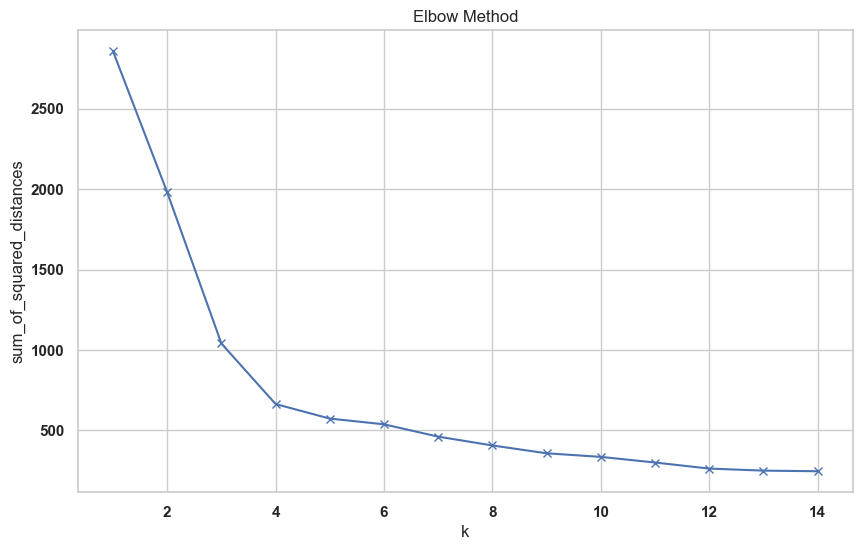

In [138]:
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('Elbow Method')
plt.show()

In [139]:
from sklearn.metrics import silhouette_score

silhouette_scores = [] 

for n_cluster in range(2, 8):
    silhouette_scores.append( 
        silhouette_score(X, KMeans(n_clusters = n_cluster).fit_predict(X))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show()

MemoryError: Unable to allocate 143. MiB for an array with shape (4332, 4332) and data type float64

In [137]:
k_means = KMeans(n_clusters=4)
model = k_means.fit(X)
y_hat = k_means.predict(X)
labels = k_means.labels_
metrics.silhouette_score(X, labels, metric = 'euclidean')


0.45236505069872557

In [138]:
cluster['Cluster'] = labels


In [139]:
table = cluster.groupby('Cluster').agg({'Recency': 'mean', 'Frequency':'mean', 'Monetization': 'mean'})
table['Non-Churner and Churners'] = cluster['Cluster'].value_counts()
table

,Recency,Frequency,Monetization,Non-Churner and Churners
Cluster,,,,
0,15.789944,9.563128,5171.718324,895
1,295.228436,1.521327,417.149791,1055
2,89.226593,1.378442,392.555287,1271
3,290.022502,5.760576,2859.353060,1111


This table provides a summary of customer segments based on clustering on (Recency, Frequency, and Monetization) 


Cluster 0 seems to represent the best customers (high frequency, high monetization).

Cluster 1 and 2 likely consist of customers at risk of churning, with low frequency and monetization.

Cluster 3 contains valuable customers with moderate purchase activity, who may need re-engagement to increase their frequency.